<a href="https://colab.research.google.com/github/DataScienceLab-DSLABI/Ensemble-Anomaly-Detection/blob/main/DS_LAB_1_Methodology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# Check available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available")
    for gpu in gpus:
        print("Name:", gpu.name, "Type:", gpu.device_type)
else:
    print("GPU is not available, using CPU.")

GPU is available
Name: /physical_device:GPU:0 Type: GPU


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d icsdataset/hai-security-dataset

Dataset URL: https://www.kaggle.com/datasets/icsdataset/hai-security-dataset
License(s): CC-BY-SA-4.0
100% 798M/798M [00:49<00:00, 18.2MB/s]
100% 798M/798M [00:49<00:00, 16.8MB/s]


In [7]:
! unzip hai-security-dataset.zip

Archive:  hai-security-dataset.zip
  inflating: graph/boiler/dcs_1001h.json  
  inflating: graph/boiler/dcs_1001h.png  
  inflating: graph/boiler/dcs_1002h.json  
  inflating: graph/boiler/dcs_1002h.png  
  inflating: graph/boiler/dcs_1003h.json  
  inflating: graph/boiler/dcs_1003h.png  
  inflating: graph/boiler/dcs_1004h.json  
  inflating: graph/boiler/dcs_1004h.png  
  inflating: graph/boiler/dcs_1010h.json  
  inflating: graph/boiler/dcs_1010h.png  
  inflating: graph/boiler/dcs_1011h.json  
  inflating: graph/boiler/dcs_1011h.png  
  inflating: graph/boiler/dcs_1020h.json  
  inflating: graph/boiler/dcs_1020h.png  
  inflating: graph/boiler/phy_boiler.json  
  inflating: graph/boiler/phy_boiler.png  
  inflating: graph/graph_analysis.ipynb  
  inflating: hai-20.07/test1.csv     
  inflating: hai-20.07/test2.csv     
  inflating: hai-20.07/train1.csv    
  inflating: hai-20.07/train2.csv    
  inflating: hai-21.03/test1.csv     
  inflating: hai-21.03/test2.csv     
  inflating: 

In [8]:
import pandas as pd

In [9]:
df_train1 = pd.read_csv('/content/hai-22.04/train1.csv')

In [10]:
df_train2 = pd.read_csv('/content/hai-22.04/train2.csv')

In [11]:
df_train3 = pd.read_csv('/content/hai-22.04/train3.csv')

In [12]:
df_train4 = pd.read_csv('/content/hai-22.04/train4.csv')

In [13]:
df_train5 = pd.read_csv('/content/hai-22.04/train5.csv')

In [14]:
df_train6 = pd.read_csv('/content/hai-22.04/train6.csv')

In [15]:
df_test1 = pd.read_csv('/content/hai-22.04/test1.csv')

In [16]:
df_test2 = pd.read_csv('/content/hai-22.04/test2.csv')

In [17]:
df_test3 = pd.read_csv('/content/hai-22.04/test3.csv')

In [18]:
df_test4 = pd.read_csv('/content/hai-22.04/test4.csv')

In [19]:
df_Train = df_train6

In [20]:
df_Test = df_test4

In [21]:
df_ALL = pd.concat([ df_test1, df_test2, df_test3, df_test4], ignore_index=True)

In [22]:
df_ALL['Attack'].value_counts()

Attack
0    349170
1     12030
Name: count, dtype: int64

In [23]:
num_rows, num_cols = df_ALL.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 361200
Number of columns: 88


**Display and describe the data**

In [24]:
df_ALL.head()

,timestamp,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
0,2021-07-10 00:00:01,0.059445,1.04366,431.328095,1034.712769,27.736847,14.91310,386.51172,31.52100,15.09755,...,0.716042,356.64423,0.00058,18131,292.86029,334.58112,20.989594,10000,27181,0
1,2021-07-10 00:00:02,0.059445,1.04217,431.328095,1034.712769,27.736847,14.95540,411.33905,31.51756,14.71477,...,0.716042,352.08698,-0.00282,18111,295.82605,332.97162,20.989594,9999,27174,0
2,2021-07-10 00:00:03,0.059445,1.03920,431.328095,1034.712769,27.736847,14.99200,438.15259,31.50269,14.30731,...,0.716042,347.63818,-0.00398,18100,300.02173,332.15784,20.989594,9999,27172,0
3,2021-07-10 00:00:04,0.059445,1.03222,431.328095,1034.712769,27.736847,15.01359,465.95908,31.47942,14.54943,...,0.716042,340.33203,-0.00152,18000,302.10144,330.96429,20.989594,9999,27168,0
4,2021-07-10 00:00:05,0.059445,1.02947,431.328095,1034.712769,27.736847,15.04767,452.05582,31.47942,15.24461,...,0.716042,335.17798,0.00072,17852,305.03113,329.02917,20.989594,9999,27172,0


In [25]:
df_ALL.head()

,timestamp,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
0,2021-07-10 00:00:01,0.059445,1.04366,431.328095,1034.712769,27.736847,14.91310,386.51172,31.52100,15.09755,...,0.716042,356.64423,0.00058,18131,292.86029,334.58112,20.989594,10000,27181,0
1,2021-07-10 00:00:02,0.059445,1.04217,431.328095,1034.712769,27.736847,14.95540,411.33905,31.51756,14.71477,...,0.716042,352.08698,-0.00282,18111,295.82605,332.97162,20.989594,9999,27174,0
2,2021-07-10 00:00:03,0.059445,1.03920,431.328095,1034.712769,27.736847,14.99200,438.15259,31.50269,14.30731,...,0.716042,347.63818,-0.00398,18100,300.02173,332.15784,20.989594,9999,27172,0
3,2021-07-10 00:00:04,0.059445,1.03222,431.328095,1034.712769,27.736847,15.01359,465.95908,31.47942,14.54943,...,0.716042,340.33203,-0.00152,18000,302.10144,330.96429,20.989594,9999,27168,0
4,2021-07-10 00:00:05,0.059445,1.02947,431.328095,1034.712769,27.736847,15.04767,452.05582,31.47942,15.24461,...,0.716042,335.17798,0.00072,17852,305.03113,329.02917,20.989594,9999,27172,0


In [26]:
df_ALL.describe()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
count,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,...,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000
mean,0.126046,1.117674,454.550574,995.900507,26.089655,12.191671,389.177033,29.895099,10.532877,10.121219,...,3.989632,366.495356,-0.000026,18251.113231,333.800331,334.064354,18.575738,9976.207248,27092.724059,0.033306
std,0.040121,0.112257,26.943286,30.576226,0.938886,16.477405,514.762268,0.995085,7.999513,8.189536,...,2.979348,59.551641,0.001640,1916.262614,38.940988,35.514027,6.440079,31.162028,100.739719,0.179434
min,0.059445,0.776570,410.712460,954.549500,25.461390,0.000000,7.150280,28.269350,0.000000,0.276180,...,0.716042,230.523010,-0.012510,12758.000000,229.709230,232.693120,6.828800,9669.000000,26855.000000,0.000000
25%,0.087930,1.047080,430.783600,973.447330,25.461390,0.000000,28.005140,29.222600,4.842795,4.579160,...,2.403980,319.552980,-0.001090,17147.000000,308.485290,313.747800,11.467260,9957.000000,27011.000000,0.000000
50%,0.126880,1.111900,456.424710,992.821230,25.687170,6.599195,237.547780,29.485430,9.242525,8.859250,...,3.344280,364.999270,0.000000,18153.000000,332.863160,332.085510,20.989594,9973.000000,27089.000000,0.000000
75%,0.150450,1.179480,482.788790,1024.175660,25.687170,18.142370,547.392640,30.401770,15.165312,14.894100,...,5.863560,413.718870,0.001010,19209.000000,355.541140,351.598690,22.404540,9999.000000,27166.000000,0.000000
max,0.197490,1.619730,494.232640,1047.185670,27.804180,100.000000,3140.576660,33.015210,62.886310,63.203430,...,9.960400,499.782960,0.015480,26731.000000,497.233090,493.037480,28.460800,10248.000000,27410.000000,1.000000


**Convert timestamp into datetime and set it as an index**

In [27]:
df_ALL['timestamp'] = pd.to_datetime(df_ALL['timestamp'])


In [28]:
df_ALL.set_index('timestamp')

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-07-10 00:00:01,0.059445,1.04366,431.328095,1034.712769,27.736847,14.91310,386.51172,31.52100,15.09755,16.32080,...,0.716042,356.64423,0.00058,18131,292.86029,334.58112,20.989594,10000,27181,0
2021-07-10 00:00:02,0.059445,1.04217,431.328095,1034.712769,27.736847,14.95540,411.33905,31.51756,14.71477,15.95459,...,0.716042,352.08698,-0.00282,18111,295.82605,332.97162,20.989594,9999,27174,0
2021-07-10 00:00:03,0.059445,1.03920,431.328095,1034.712769,27.736847,14.99200,438.15259,31.50269,14.30731,14.79492,...,0.716042,347.63818,-0.00398,18100,300.02173,332.15784,20.989594,9999,27172,0
2021-07-10 00:00:04,0.059445,1.03222,431.328095,1034.712769,27.736847,15.01359,465.95908,31.47942,14.54943,14.72626,...,0.716042,340.33203,-0.00152,18000,302.10144,330.96429,20.989594,9999,27168,0
2021-07-10 00:00:05,0.059445,1.02947,431.328095,1034.712769,27.736847,15.04767,452.05582,31.47942,15.24461,14.78729,...,0.716042,335.17798,0.00072,17852,305.03113,329.02917,20.989594,9999,27172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-16 23:59:56,0.069440,1.04908,467.038540,1015.069640,25.687170,29.89865,1056.03259,29.45263,14.31306,15.03143,...,2.403980,373.20966,0.00036,17966,318.08813,327.31122,26.760940,9917,26971,0
2021-07-16 23:59:57,0.069440,1.05057,467.038540,1015.069640,25.687170,29.95392,1026.05530,29.45758,15.02294,13.74206,...,2.403980,376.66376,-0.00470,18073,317.78070,327.36548,26.760940,9917,26970,0
2021-07-16 23:59:58,0.069440,1.04839,467.038540,1015.069640,25.687170,29.99687,981.37659,29.45034,16.00788,13.64288,...,2.403980,377.76691,-0.00130,17983,319.11890,326.62396,26.760940,9916,26973,0


# **I need to train the model differently**
isolation : mixed : separate the data for you , you dont need to train it and then test it on another dataset
HDBSCAN : mixed data
VAE: normal data
Deep SVDD: we can train it with the mixed data
RF: mixed
Tune the models separately
Split them randomly ( the sets ) : how to do this
Tune the models on their own
Add the methodology
hai 22-04, we combine the whole test datasets, if it's in the same month ( discard the time stamp and use a synthatic one

In [29]:
import matplotlib.pyplot as plt

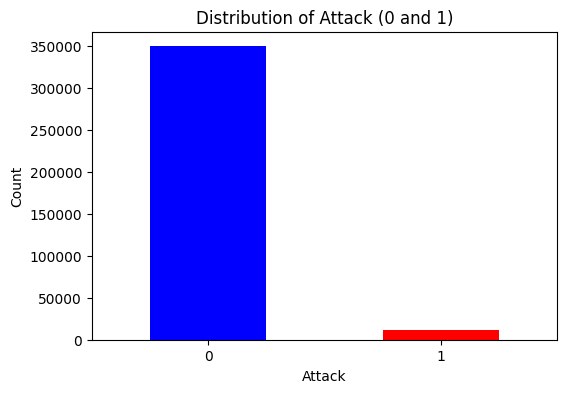

In [30]:
plt.figure(figsize=(6, 4))
df_ALL['Attack'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Attack (0 and 1)')
plt.xlabel('Attack')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Check for null values**

In [31]:
null_counts = df_ALL.isnull().sum()
for i in null_counts:
  if i!=0:
    print(null_counts)
else:
    print("the dataset does not have null values")

the dataset does not have null values


**Check for duplicates**

In [32]:
duplicates = df_ALL[df_ALL.duplicated()]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


**check for columns with one value: **

In [33]:
# Get the number of unique values in each column
unique_counts = df_ALL.nunique()

# Filter columns with only one unique value
columns_with_one_value = unique_counts[unique_counts == 1].index.tolist()

if columns_with_one_value:
    print("Columns with only one unique value:")
    print(columns_with_one_value)
else:
    print("No columns with only one unique value.")

Columns with only one unique value:
['P1_PIT01_HH', 'P1_PP01AD', 'P1_PP01AR', 'P1_PP01BD', 'P1_PP01BR', 'P1_PP02D', 'P1_PP02R', 'P1_SOL01D', 'P1_SOL03D', 'P1_STSP', 'P2_RTR', 'P2_TripEx', 'P2_VTR01', 'P2_VTR02', 'P2_VTR03', 'P2_VTR04', 'P3_LH01', 'P3_LL01']


In [34]:
# Drop the identified columns
df_ALL.drop(columns=columns_with_one_value, inplace=True)
print("Columns dropped:", columns_with_one_value)

Columns dropped: ['P1_PIT01_HH', 'P1_PP01AD', 'P1_PP01AR', 'P1_PP01BD', 'P1_PP01BR', 'P1_PP02D', 'P1_PP02R', 'P1_SOL01D', 'P1_SOL03D', 'P1_STSP', 'P2_RTR', 'P2_TripEx', 'P2_VTR01', 'P2_VTR02', 'P2_VTR03', 'P2_VTR04', 'P3_LH01', 'P3_LL01']


In [35]:
df_ALL.head()

,timestamp,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
0,2021-07-10 00:00:01,0.059445,1.04366,431.328095,1034.712769,27.736847,14.91310,386.51172,31.52100,15.09755,...,0.716042,356.64423,0.00058,18131,292.86029,334.58112,20.989594,10000,27181,0
1,2021-07-10 00:00:02,0.059445,1.04217,431.328095,1034.712769,27.736847,14.95540,411.33905,31.51756,14.71477,...,0.716042,352.08698,-0.00282,18111,295.82605,332.97162,20.989594,9999,27174,0
2,2021-07-10 00:00:03,0.059445,1.03920,431.328095,1034.712769,27.736847,14.99200,438.15259,31.50269,14.30731,...,0.716042,347.63818,-0.00398,18100,300.02173,332.15784,20.989594,9999,27172,0
3,2021-07-10 00:00:04,0.059445,1.03222,431.328095,1034.712769,27.736847,15.01359,465.95908,31.47942,14.54943,...,0.716042,340.33203,-0.00152,18000,302.10144,330.96429,20.989594,9999,27168,0
4,2021-07-10 00:00:05,0.059445,1.02947,431.328095,1034.712769,27.736847,15.04767,452.05582,31.47942,15.24461,...,0.716042,335.17798,0.00072,17852,305.03113,329.02917,20.989594,9999,27172,0


**Check for highly correlated columns**

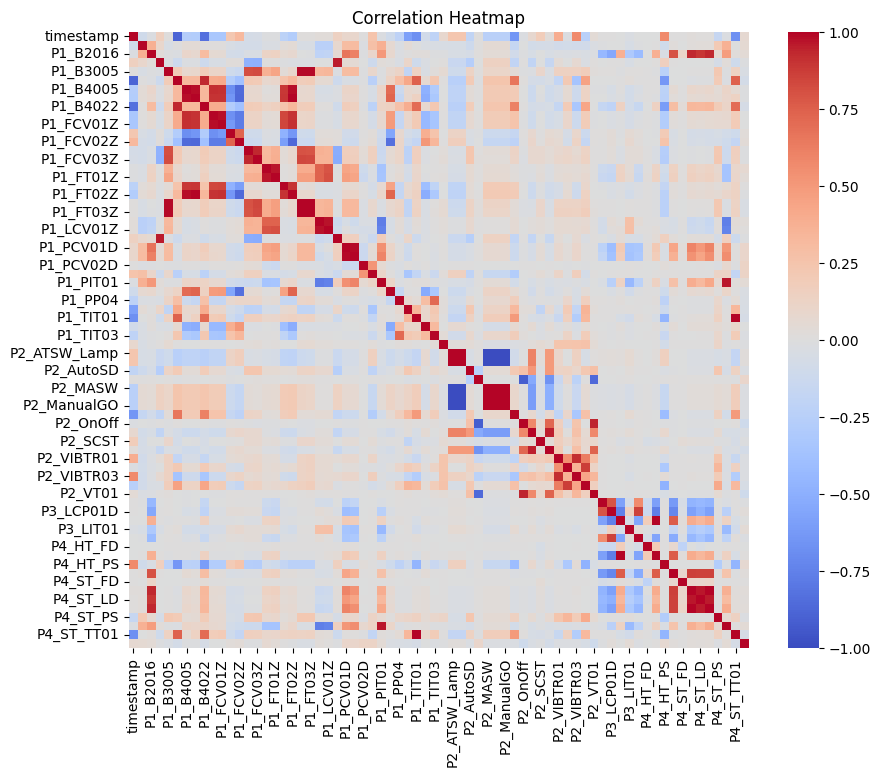

In [36]:
import seaborn as sns
# Compute the correlation matrix
corr_matrix = df_ALL.corr()
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [37]:
df_corr = df_ALL.corr().abs()
written = []
highly_correlated_columns = []
written1 = []
for column in df_corr:
    for index in df_corr.index[df_corr[column] > 0.9]:
        if index not in written:
            if index != column:
              print(f"{column} and {index} have a correlation of {df_corr[column][index]:.2f}")
              written.append(column)
              highly_correlated_columns.append(df_corr[column][index])
              written1.append(index)


P1_B2016 and P4_ST_GOV have a correlation of 0.93
P1_B2016 and P4_ST_PO have a correlation of 0.94
P1_B3004 and P1_LIT01 have a correlation of 0.96
P1_B3005 and P1_FT03 have a correlation of 0.99
P1_B3005 and P1_FT03Z have a correlation of 0.99
P1_B4002 and P1_B4022 have a correlation of 0.94
P1_B4005 and P1_B400B have a correlation of 0.98
P1_B4005 and P1_FCV01D have a correlation of 0.92
P1_B4005 and P1_FCV01Z have a correlation of 0.91
P1_B4005 and P1_FT02Z have a correlation of 0.98
P1_B400B and P1_FCV01D have a correlation of 0.90
P1_B400B and P1_FCV01Z have a correlation of 0.90
P1_B400B and P1_FT02Z have a correlation of 0.99
P1_FCV01D and P1_FCV01Z have a correlation of 0.98
P1_FCV01D and P1_FT02Z have a correlation of 0.90
P1_FCV01Z and P1_FT02Z have a correlation of 0.91
P1_FCV03D and P1_FCV03Z have a correlation of 0.94
P1_FT01 and P1_FT01Z have a correlation of 0.96
P1_FT03 and P1_FT03Z have a correlation of 1.00
P1_LCV01D and P1_LCV01Z have a correlation of 0.97
P1_PCV01D 

In [38]:
# Remove one of the highly correlated features
Corr = list(zip(written1, written,highly_correlated_columns))
# Count the number of highly correlated columns
num_highly_correlated = len(highly_correlated_columns)
print(f"Number of highly correlated columns: {num_highly_correlated}")

Number of highly correlated columns: 41


In [39]:
columns_to_drop = []
for pair in Corr:
    print(pair[0]," ",pair[1])
    if pair[0] not in columns_to_drop and pair[1] not in columns_to_drop:
        columns_to_drop.append(pair[1])

P4_ST_GOV   P1_B2016
P4_ST_PO   P1_B2016
P1_LIT01   P1_B3004
P1_FT03   P1_B3005
P1_FT03Z   P1_B3005
P1_B4022   P1_B4002
P1_B400B   P1_B4005
P1_FCV01D   P1_B4005
P1_FCV01Z   P1_B4005
P1_FT02Z   P1_B4005
P1_FCV01D   P1_B400B
P1_FCV01Z   P1_B400B
P1_FT02Z   P1_B400B
P1_FCV01Z   P1_FCV01D
P1_FT02Z   P1_FCV01D
P1_FT02Z   P1_FCV01Z
P1_FCV03Z   P1_FCV03D
P1_FT01Z   P1_FT01
P1_FT03Z   P1_FT03
P1_LCV01Z   P1_LCV01D
P1_PCV01Z   P1_PCV01D
P4_ST_PT01   P1_PIT01
P4_ST_TT01   P1_TIT01
P2_AutoGO   P2_ATSW_Lamp
P2_MASW   P2_ATSW_Lamp
P2_MASW_Lamp   P2_ATSW_Lamp
P2_ManualGO   P2_ATSW_Lamp
P2_MASW   P2_AutoGO
P2_MASW_Lamp   P2_AutoGO
P2_ManualGO   P2_AutoGO
P2_OnOff   P2_Emerg
P2_MASW_Lamp   P2_MASW
P2_ManualGO   P2_MASW
P2_ManualGO   P2_MASW_Lamp
P2_VT01   P2_OnOff
P2_SIT01   P2_SCO
P2_VIBTR03   P2_VIBTR01
P4_HT_PO   P3_LCV01D
P4_ST_LD   P4_ST_GOV
P4_ST_PO   P4_ST_GOV
P4_ST_PO   P4_ST_LD


In [40]:
df_ALL.head()


,timestamp,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
0,2021-07-10 00:00:01,0.059445,1.04366,431.328095,1034.712769,27.736847,14.91310,386.51172,31.52100,15.09755,...,0.716042,356.64423,0.00058,18131,292.86029,334.58112,20.989594,10000,27181,0
1,2021-07-10 00:00:02,0.059445,1.04217,431.328095,1034.712769,27.736847,14.95540,411.33905,31.51756,14.71477,...,0.716042,352.08698,-0.00282,18111,295.82605,332.97162,20.989594,9999,27174,0
2,2021-07-10 00:00:03,0.059445,1.03920,431.328095,1034.712769,27.736847,14.99200,438.15259,31.50269,14.30731,...,0.716042,347.63818,-0.00398,18100,300.02173,332.15784,20.989594,9999,27172,0
3,2021-07-10 00:00:04,0.059445,1.03222,431.328095,1034.712769,27.736847,15.01359,465.95908,31.47942,14.54943,...,0.716042,340.33203,-0.00152,18000,302.10144,330.96429,20.989594,9999,27168,0
4,2021-07-10 00:00:05,0.059445,1.02947,431.328095,1034.712769,27.736847,15.04767,452.05582,31.47942,15.24461,...,0.716042,335.17798,0.00072,17852,305.03113,329.02917,20.989594,9999,27172,0


In [41]:
df_ALL.drop(columns=columns_to_drop, inplace=True)
print("%d highly correlated columns removed."%len(columns_to_drop))
print("Columns droped:", list(columns_to_drop))

26 highly correlated columns removed.
Columns droped: ['P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P1_B4005', 'P1_B400B', 'P1_FCV01D', 'P1_FCV01Z', 'P1_FCV03D', 'P1_FT01', 'P1_FT03', 'P1_LCV01D', 'P1_PCV01D', 'P1_PIT01', 'P1_TIT01', 'P2_ATSW_Lamp', 'P2_AutoGO', 'P2_Emerg', 'P2_MASW', 'P2_MASW_Lamp', 'P2_OnOff', 'P2_SCO', 'P2_VIBTR01', 'P3_LCV01D', 'P4_ST_GOV', 'P4_ST_LD']


In [42]:
df_ALL.set_index('timestamp', inplace = True )

**Feature selection**

In [43]:
data = [
    ("P3_FIT01", 0.080920),
    ("P3_LIT01", 0.078900),
    ("P1_PCV01Z", 0.061219),
    ("P1_TIT02", 0.058049),
    ("P1_TIT03", 0.056988),
    ("P1_LCV01Z", 0.049253),
    ("P1_LIT01", 0.048325),
    ("P4_ST_PT01", 0.041343),
    ("P2_SIT01", 0.039808),
    ("P1_FT01Z", 0.038544),
    ("P4_ST_TT01", 0.037935),
    ("P1_FCV03Z", 0.037334),
    ("P1_PP04", 0.034060),
    ("P1_FT02Z", 0.027124),
    ("P1_B2004", 0.026538),
    ("P3_LCP01D", 0.024296),
    ("P1_FT03Z", 0.023085),
    ("P1_PCV02Z", 0.022355),
    ("P3_PIT01", 0.021480),
    ("P2_AutoSD", 0.021098),
    ("P1_PIT02", 0.018627),
    ("P4_LD", 0.017893),
    ("P4_ST_PS", 0.016534),
    ("P4_ST_PO", 0.015788),
    ("P4_HT_PO", 0.014968),
    ("P2_ManualSD", 0.014793),
    ("P2_VIBTR03", 0.012445),
    ("P4_HT_PS", 0.011533),
    ("P1_PP04SP", 0.010807),
    ("P2_VIBTR04", 0.009792),
    ("P2_VT01", 0.006771),
    ("P4_HT_FD", 0.005086),
    ("P1_PCV02D", 0.004124),
    ("P3_LL01", 0.002726),
    ("P2_SCST", 0.002617),
    ("P1_FCV02D", 0.002447),
    ("P2_OnOff", 0.001552),
    ("P4_ST_FD", 0.001502),
    ("P2_24Vdc", 0.001340)
]


In [44]:
# Assuming 'df_ALL' is your DataFrame and 'y' is your target variable
y = df_ALL['Attack']
selected_features = [feat for feat, importance in data if importance >= 0.007] + ['Attack']

# Keep only the selected features and the 'Attack' column
df_ALL = df_ALL[selected_features]

# Merge 'y' with 'df_ALL' based on the index
df_ALL = df_ALL.merge(y, left_index=True, right_index=True)


In [45]:
"""from sklearn.ensemble import RandomForestClassifier

X = df_ALL.drop(columns=['Attack'])

y = df_ALL['Attack']

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top features by importance:")
print(feature_importance_df)"""

'from sklearn.ensemble import RandomForestClassifier\n\nX = df_ALL.drop(columns=[\'Attack\'])\n\ny = df_ALL[\'Attack\']\n\nrf_classifier = RandomForestClassifier()\nrf_classifier.fit(X, y)\n\nfeature_importances = rf_classifier.feature_importances_\nfeature_importance_df = pd.DataFrame({\'Feature\': X.columns, \'Importance\': feature_importances})\nfeature_importance_df = feature_importance_df.sort_values(by=\'Importance\', ascending=False)\n\nprint("Top features by importance:")\nprint(feature_importance_df)'

In [46]:
"""selected_features = feature_importance_df[feature_importance_df['Importance'] >= 0.007]['Feature'].tolist() + list(y)
df_ALL.drop(columns=[col for col in df_ALL.columns if col not in selected_features or col == 'Attack'])
df_ALL = df_ALL.merge(y, left_index=True, right_index=True)"""

"selected_features = feature_importance_df[feature_importance_df['Importance'] >= 0.007]['Feature'].tolist() + list(y)\ndf_ALL.drop(columns=[col for col in df_ALL.columns if col not in selected_features or col == 'Attack'])\ndf_ALL = df_ALL.merge(y, left_index=True, right_index=True)"

In [47]:
df_ALL.head()

,P3_FIT01,P3_LIT01,P1_PCV01Z,P1_TIT02,P1_TIT03,P1_LCV01Z,P1_LIT01,P4_ST_PT01,P2_SIT01,P1_FT01Z,...,P4_ST_PS,P4_ST_PO,P4_HT_PO,P2_ManualSD,P2_VIBTR03,P4_HT_PS,P1_PP04SP,P2_VIBTR04,Attack_x,Attack_y
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-07-10 00:00:01,161,10289,30.90057,45.33997,27.84305,11.68213,437.98016,10000,927,300.11276,...,20.989594,334.58112,71.77734,12.903438,6.8489,0.716042,27.796206,0.4010,0,0
2021-07-10 00:00:02,155,10266,30.88531,45.33997,27.84305,11.68213,437.62238,9999,926,298.12650,...,20.989594,332.97162,74.29114,12.903438,7.0499,0.716042,27.796206,0.4187,0,0
2021-07-10 00:00:03,149,10238,30.58014,45.33997,27.84305,11.68213,437.11121,9999,927,297.13321,...,20.989594,332.15784,70.54761,12.903438,6.8409,0.716042,27.796206,0.0691,0,0
2021-07-10 00:00:04,148,10215,30.06897,45.33997,27.84305,11.68213,437.16232,9999,924,295.14697,...,20.989594,330.96429,59.44373,12.903438,7.2548,0.716042,27.796206,0.3306,0,0
2021-07-10 00:00:05,148,10085,30.05371,45.33997,27.84305,11.68213,437.11121,9999,927,295.14697,...,20.989594,329.02917,57.27356,12.903438,6.7417,0.716042,27.796206,0.2150,0,0


Categorical data

In [48]:
cols = df_ALL.columns

In [49]:
 num_cols = df_ALL._get_numeric_data().columns

In [50]:
print("categorical data: ")
list(set(cols) - set(num_cols))

categorical data: 


[]

Normalization: do the normalization on the df_ALL

In [51]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df_ALL' is your original DataFrame with a datetime index
# Backup the datetime index
original_index = df_ALL.index

# Select only numerical columns from the DataFrame
numerical_columns = df_ALL.select_dtypes(include=['number'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the data
normalized_data = scaler.fit_transform(numerical_columns)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numerical_columns.columns)

# Restore the original datetime index
normalized_df.index = original_index

# Now 'normalized_df' contains the normalized data with the original datetime index intact
print(normalized_df.head())  # Print the first few rows of the normalized DataFrame


                     P3_FIT01  P3_LIT01  P1_PCV01Z  P1_TIT02  P1_TIT03  \
timestamp                                                                
2021-07-10 00:00:01  0.023101  0.268563   0.401082  0.703449  0.466517   
2021-07-10 00:00:02  0.022235  0.267208   0.400881  0.703449  0.466517   
2021-07-10 00:00:03  0.021369  0.265560   0.396875  0.703449  0.466517   
2021-07-10 00:00:04  0.021224  0.264205   0.390163  0.703449  0.466517   
2021-07-10 00:00:05  0.021224  0.256551   0.389963  0.703449  0.466517   

                     P1_LCV01Z  P1_LIT01  P4_ST_PT01  P2_SIT01  P1_FT01Z  ...  \
timestamp                                                                 ...   
2021-07-10 00:00:01   0.123913  0.476673    0.571675  0.838156  0.232013  ...   
2021-07-10 00:00:02   0.123913  0.475867    0.569948  0.837251  0.230466  ...   
2021-07-10 00:00:03   0.123913  0.474715    0.569948  0.838156  0.229693  ...   
2021-07-10 00:00:04   0.123913  0.474830    0.569948  0.835443  0.228146  ..

In [52]:
normalized_df.head()

,P3_FIT01,P3_LIT01,P1_PCV01Z,P1_TIT02,P1_TIT03,P1_LCV01Z,P1_LIT01,P4_ST_PT01,P2_SIT01,P1_FT01Z,...,P4_ST_PS,P4_ST_PO,P4_HT_PO,P2_ManualSD,P2_VIBTR03,P4_HT_PS,P1_PP04SP,P2_VIBTR04,Attack_x,Attack_y
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-07-10 00:00:01,0.023101,0.268563,0.401082,0.703449,0.466517,0.123913,0.476673,0.571675,0.838156,0.232013,...,0.654622,0.391359,0.831028,0.716858,0.708277,0.0,0.968205,0.580402,0.0,0.0
2021-07-10 00:00:02,0.022235,0.267208,0.400881,0.703449,0.466517,0.123913,0.475867,0.569948,0.837251,0.230466,...,0.654622,0.385176,0.860169,0.716858,0.729064,0.0,0.968205,0.587290,0.0,0.0
2021-07-10 00:00:03,0.021369,0.265560,0.396875,0.703449,0.466517,0.123913,0.474715,0.569948,0.838156,0.229693,...,0.654622,0.382051,0.816772,0.716858,0.707450,0.0,0.968205,0.451238,0.0,0.0
2021-07-10 00:00:04,0.021224,0.264205,0.390163,0.703449,0.466517,0.123913,0.474830,0.569948,0.835443,0.228146,...,0.654622,0.377466,0.688051,0.716858,0.750253,0.0,0.968205,0.553004,0.0,0.0
2021-07-10 00:00:05,0.021224,0.256551,0.389963,0.703449,0.466517,0.123913,0.474715,0.569948,0.838156,0.228146,...,0.654622,0.370033,0.662893,0.716858,0.697191,0.0,0.968205,0.508017,0.0,0.0


In [53]:
df_ALL = normalized_df

In [54]:
df_ALL.head()

,P3_FIT01,P3_LIT01,P1_PCV01Z,P1_TIT02,P1_TIT03,P1_LCV01Z,P1_LIT01,P4_ST_PT01,P2_SIT01,P1_FT01Z,...,P4_ST_PS,P4_ST_PO,P4_HT_PO,P2_ManualSD,P2_VIBTR03,P4_HT_PS,P1_PP04SP,P2_VIBTR04,Attack_x,Attack_y
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-07-10 00:00:01,0.023101,0.268563,0.401082,0.703449,0.466517,0.123913,0.476673,0.571675,0.838156,0.232013,...,0.654622,0.391359,0.831028,0.716858,0.708277,0.0,0.968205,0.580402,0.0,0.0
2021-07-10 00:00:02,0.022235,0.267208,0.400881,0.703449,0.466517,0.123913,0.475867,0.569948,0.837251,0.230466,...,0.654622,0.385176,0.860169,0.716858,0.729064,0.0,0.968205,0.587290,0.0,0.0
2021-07-10 00:00:03,0.021369,0.265560,0.396875,0.703449,0.466517,0.123913,0.474715,0.569948,0.838156,0.229693,...,0.654622,0.382051,0.816772,0.716858,0.707450,0.0,0.968205,0.451238,0.0,0.0
2021-07-10 00:00:04,0.021224,0.264205,0.390163,0.703449,0.466517,0.123913,0.474830,0.569948,0.835443,0.228146,...,0.654622,0.377466,0.688051,0.716858,0.750253,0.0,0.968205,0.553004,0.0,0.0
2021-07-10 00:00:05,0.021224,0.256551,0.389963,0.703449,0.466517,0.123913,0.474715,0.569948,0.838156,0.228146,...,0.654622,0.370033,0.662893,0.716858,0.697191,0.0,0.968205,0.508017,0.0,0.0


# **Baseline implementation**

**Step 1: Import librairies**

In [55]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.neighbors import NearestNeighbors
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Layer
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

**Step 2: Implement anomaly detection models**

In [56]:
def determine_attack(row):
    if row['Attack_x'] == 0 and row['Attack_y'] == 0:
        return 0
    elif row['Attack_y'] == 1:
        return 1
    else:
        return None  # You might want to handle other cases depending on your data

# Apply the function to create the new 'Attack' column


In [57]:
df_ALL['Attack'] = df_ALL.apply(determine_attack, axis=1)

Split the data into train and test

In [58]:
"""import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame called 'df' containing your data
# and a column 'Attack' indicating whether each data point is anomalous

# Split the DataFrame into anomalous and non-anomalous subsets
anomalous_data = df_ALL[df_ALL['Attack'] == 1]
non_anomalous_data = df_ALL[df_ALL['Attack'] == 0]

# Calculate the proportions of anomalous and non-anomalous data points
anomalous_proportion = len(anomalous_data) / len(df_ALL)
non_anomalous_proportion = len(non_anomalous_data) / len(df_ALL)

# Calculate the number of samples to take from each subset
anomalous_sample_size = int(anomalous_proportion * 1000)
non_anomalous_sample_size = int(non_anomalous_proportion * 1000)

# Sample from the anomalous and non-anomalous subsets
anomalous_sample = anomalous_data.sample(n=anomalous_sample_size, replace=False, random_state=42)
non_anomalous_sample = non_anomalous_data.sample(n=non_anomalous_sample_size, replace=False, random_state=42)

# Concatenate the samples
sampled_df = pd.concat([anomalous_sample, non_anomalous_sample])

# Optionally, shuffle the sampled DataFrame
sampled_df = sampled_df.sample(frac=1, random_state=42)
"""

"import pandas as pd\nfrom sklearn.model_selection import train_test_split\n\n# Assuming you have a DataFrame called 'df' containing your data\n# and a column 'Attack' indicating whether each data point is anomalous\n\n# Split the DataFrame into anomalous and non-anomalous subsets\nanomalous_data = df_ALL[df_ALL['Attack'] == 1]\nnon_anomalous_data = df_ALL[df_ALL['Attack'] == 0]\n\n# Calculate the proportions of anomalous and non-anomalous data points\nanomalous_proportion = len(anomalous_data) / len(df_ALL)\nnon_anomalous_proportion = len(non_anomalous_data) / len(df_ALL)\n\n# Calculate the number of samples to take from each subset\nanomalous_sample_size = int(anomalous_proportion * 1000)\nnon_anomalous_sample_size = int(non_anomalous_proportion * 1000)\n\n# Sample from the anomalous and non-anomalous subsets\nanomalous_sample = anomalous_data.sample(n=anomalous_sample_size, replace=False, random_state=42)\nnon_anomalous_sample = non_anomalous_data.sample(n=non_anomalous_sample_size,

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'data' with features and a target column
# X contains features, y contains target variable
X = df_ALL.drop(columns=['Attack'])
y = df_ALL['Attack']

# Split the data into training and testing sets
# test_size=0.2 means 80% of the data will be used for training and 20% for testing
# random_state is set for reproducibility, so you get the same split every time you run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now you have X_train, X_test, y_train, y_test ready for training and evaluation


In [60]:
df_ALL.head()

,P3_FIT01,P3_LIT01,P1_PCV01Z,P1_TIT02,P1_TIT03,P1_LCV01Z,P1_LIT01,P4_ST_PT01,P2_SIT01,P1_FT01Z,...,P4_ST_PO,P4_HT_PO,P2_ManualSD,P2_VIBTR03,P4_HT_PS,P1_PP04SP,P2_VIBTR04,Attack_x,Attack_y,Attack
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-07-10 00:00:01,0.023101,0.268563,0.401082,0.703449,0.466517,0.123913,0.476673,0.571675,0.838156,0.232013,...,0.391359,0.831028,0.716858,0.708277,0.0,0.968205,0.580402,0.0,0.0,0
2021-07-10 00:00:02,0.022235,0.267208,0.400881,0.703449,0.466517,0.123913,0.475867,0.569948,0.837251,0.230466,...,0.385176,0.860169,0.716858,0.729064,0.0,0.968205,0.587290,0.0,0.0,0
2021-07-10 00:00:03,0.021369,0.265560,0.396875,0.703449,0.466517,0.123913,0.474715,0.569948,0.838156,0.229693,...,0.382051,0.816772,0.716858,0.707450,0.0,0.968205,0.451238,0.0,0.0,0
2021-07-10 00:00:04,0.021224,0.264205,0.390163,0.703449,0.466517,0.123913,0.474830,0.569948,0.835443,0.228146,...,0.377466,0.688051,0.716858,0.750253,0.0,0.968205,0.553004,0.0,0.0,0
2021-07-10 00:00:05,0.021224,0.256551,0.389963,0.703449,0.466517,0.123913,0.474715,0.569948,0.838156,0.228146,...,0.370033,0.662893,0.716858,0.697191,0.0,0.968205,0.508017,0.0,0.0,0


Sigmoid function

In [61]:
# Sigmoid function to convert anomaly scores into probabilities
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

**1st model : Isolation Forest**

In [62]:
# Isolation Forest
def train_isolation_forest(data):
    model = IsolationForest( n_estimators=100, random_state=42 )
    return model

In [63]:
anomaly_score__train_isolation_F = []
anomaly_score__test_isolation_F = []

In [64]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import IsolationForest

In [65]:
import tensorflow as tf
from tensorflow.keras import Model
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
def custom_loss(y_true, y_pred):
      return tf.reduce_mean(tf.square(y_true - y_pred))

class SVDD(Model):
    def __init__(self, input_dim, latent_dim):
        super(SVDD, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(latent_dim, activation='relu')
        ])
        self.center = tf.Variable(initial_value=tf.zeros((1, latent_dim)), trainable=True)

    @tf.function
    def call(self, x):
        z = self.encoder(x)  # Pass x directly to the encoder
        distance = tf.reduce_sum(tf.square(z - self.center), axis=1)
        return distance

    def compute_output_shape(self, input_shape):
        return (input_shape[0], 1)

    def decision_function(self, x):
        return self.predict(x)

    def custom_loss(y_true, y_pred):
      return tf.reduce_mean(tf.square(y_true - y_pred))

    def train_deep_svdd(X_train, y_train, latent_dim=2):
        svdd = SVDD(X_train.shape[1], latent_dim)
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
        svdd.compile(optimizer=optimizer, loss=custom_loss)

        target_data = tf.ones((tf.shape(X_train)[0], 1))

        for epoch in range(1, 101):
            history = svdd.fit(X_train, target_data, epochs=1, batch_size=128)
            train_loss = history.history['loss'][0]

            print(f'Epoch {epoch}/100 - Training Loss: {train_loss:.4f}')
        return svdd

In [66]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import precision_recall_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Custom VAE loss function combining reconstruction loss and KL divergence loss
def custom_vae_loss(data, reconstruction, z_mean, z_log_var):
    reconstruction_loss = tf.reduce_mean(
        keras.losses.binary_crossentropy(data, reconstruction)
    )
    kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
    kl_loss = tf.reduce_mean(kl_loss)
    total_loss = reconstruction_loss + kl_loss
    return total_loss

# Function to calculate anomaly scores based on reconstruction errors
def calculate_anomaly_scores(data, reconstruction):
    reconstruction_errors = np.mean(np.abs(data - reconstruction.squeeze()), axis=1)
    anomaly_scores = sigmoid(reconstruction_errors)  # Apply sigmoid function to normalize scores
    return anomaly_scores

# Evaluate model performance
def evaluate_model(y_true_train, anomaly_scores_train, y_true_test, anomaly_scores_test, threshold=0.5):
    precision_train, recall_train, _ = precision_recall_curve(y_true_train, anomaly_scores_train)
    f1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
    f1_score_train = np.nan_to_num(f1_score_train)

    precision_test, recall_test, _ = precision_recall_curve(y_true_test, anomaly_scores_test)
    f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
    f1_score_test = np.nan_to_num(f1_score_test)

    auc_roc_train = roc_auc_score(y_true_train, anomaly_scores_train)
    auc_roc_test = roc_auc_score(y_true_test, anomaly_scores_test)

    predicted_labels_train = (anomaly_scores_train >= threshold).astype(int)
    predicted_labels_test = (anomaly_scores_test >= threshold).astype(int)

    accuracy_train = accuracy_score(y_true_train, predicted_labels_train)
    accuracy_test = accuracy_score(y_true_test, predicted_labels_test)

    classification_report_train = classification_report(y_true_train, predicted_labels_train)
    classification_report_test = classification_report(y_true_test, predicted_labels_test)

    return np.max(precision_test), np.max(recall_test), np.max(f1_score_test), auc_roc_test, accuracy_test, classification_report_test

# Define the Sampling layer for the VAE
class Sampling(layers.Layer):
    def call(self, inputs, training=False):
        z_mean, z_log_var = inputs
        if training:
            batch = tf.shape(z_mean)[0]
            dim = tf.shape(z_mean)[1]
            epsilon = tf.random.normal(shape=(batch, dim))
            return z_mean + tf.exp(0.5 * z_log_var) * epsilon
        else:
            return z_mean + tf.exp(0.5 * z_log_var)

# Define the encoder architecture
latent_dim = 10
encoder_inputs = keras.Input(shape=(32,))
x = layers.Dense(128, activation='relu')(encoder_inputs)
x = layers.Dense(64, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')

# Define the decoder architecture
decoder_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(64, activation='relu')(decoder_inputs)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(32, activation='sigmoid')(x)
decoder = keras.Model(decoder_inputs, outputs, name='decoder')

# Define the VAE model
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(kl_loss)
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def call(self, data, training=False):
        if training:
            z_mean, z_log_var, z = self.encoder(data)
            return self.decoder(z)
        else:
            z_mean, _, z = self.encoder(data)
            return self.decoder(z)

# Function to calculate sigmoid activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [67]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from keras.models import Model
from keras import backend as K
# Define the anomaly detection module function
def anomaly_detection_module(X_train, X_test, y_train, y_test):
    results = {}
    anomaly_scores_train = {}
    anomaly_scores_test = {}

    # Anomaly detector 1: Random Forest
    RCCF = RandomForestClassifier(n_estimators=200, random_state=42)
    y_train_labels = np.zeros(len(X_train))
    y_train_labels[y_train == 1] = 1
    RCCF.fit(X_train, y_train_labels)
    anomaly_scores_train_RCCF = RCCF.predict_proba(X_train)[:, 0]
    anomaly_scores_test_RCCF = RCCF.predict_proba(X_test)[:, 0]
    threshold_RCCF = np.percentile(anomaly_scores_train_RCCF, 5)
    y_pred_train_RCCF = (anomaly_scores_train_RCCF < threshold_RCCF).astype(int)
    y_pred_test_RCCF = (anomaly_scores_test_RCCF < threshold_RCCF).astype(int)
    accuracy_train_RCCF = accuracy_score(y_train_labels, y_pred_train_RCCF)
    accuracy_test_RCCF = accuracy_score(y_test, y_pred_test_RCCF)
    conf_matrix_test_RCCF = confusion_matrix(y_test, y_pred_test_RCCF)
    precision_test_RCCF = precision_score(y_test, y_pred_test_RCCF)
    recall_test_RCCF = recall_score(y_test, y_pred_test_RCCF)
    f1_test_RCCF = f1_score(y_test, y_pred_test_RCCF)
    classification_report_RCCF = classification_report(y_test, y_pred_test_RCCF)
    results['Anomaly Detector 1'] = {
        'Precision Test': precision_test_RCCF,
        'Recall Test': recall_test_RCCF,
        'F1 Score Test': f1_test_RCCF,
        'Accuracy Test': accuracy_test_RCCF,
        'Confusion Matrix Test': conf_matrix_test_RCCF,
        'Classification Report Test': classification_report_RCCF
    }
    anomaly_scores_train['Anomaly Detector 1'] = anomaly_scores_train_RCCF
    anomaly_scores_test['Anomaly Detector 1'] = anomaly_scores_test_RCCF

    # Anomaly detector 2: Local Outlier Factor
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
    y_pred_test_LOF = lof.fit_predict(X_test_scaled)
    y_pred_test_binary_LOF = (y_pred_test_LOF == 1)
    precision_test_LOF = precision_score(y_test, y_pred_test_binary_LOF, zero_division=1)
    recall_test_LOF = recall_score(y_test, y_pred_test_binary_LOF)
    f1_test_LOF = f1_score(y_test, y_pred_test_binary_LOF)
    accuracy_test_LOF = accuracy_score(y_test, y_pred_test_binary_LOF)
    confusion_matrix_test_LOF = confusion_matrix(y_test, y_pred_test_binary_LOF)
    classification_report_text_LOF = classification_report(y_test, y_pred_test_binary_LOF)
    results['Anomaly Detector 2'] = {
        'Precision Test': precision_test_LOF,
        'Recall Test': recall_test_LOF,
        'F1 Score Test': f1_test_LOF,
        'Accuracy Test': accuracy_test_LOF,
        'Confusion Matrix Test': confusion_matrix_test_LOF,
        'Classification Report Test': classification_report_text_LOF
    }
    anomaly_scores_test['Anomaly Detector 2'] = lof.negative_outlier_factor_

    # Anomaly detector 3: Isolation Forest
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)
    isolation_forest = IsolationForest(n_estimators=1000, contamination=0.01, random_state=42)
    isolation_forest.fit(X_train_scaled)
    anomaly_score_train_IF = isolation_forest.decision_function(X_train_scaled)
    anomaly_score_test_IF = isolation_forest.decision_function(X_test_scaled)
    threshold_IF = np.percentile(anomaly_score_train_IF, 50)
    y_pred_train_IF = (anomaly_score_train_IF > threshold_IF).astype(int)
    y_pred_test_IF = (anomaly_score_test_IF > threshold_IF).astype(int)
    accuracy_test_IF = accuracy_score(y_test, y_pred_test_IF)
    confusion_matrix_test_IF = confusion_matrix(y_test, y_pred_test_IF)
    precision_test_IF = precision_score(y_test, y_pred_test_IF)
    recall_test_IF = recall_score(y_test, y_pred_test_IF)
    f1_test_IF = f1_score(y_test, y_pred_test_IF)
    classification_report_text_IF = classification_report(y_test, y_pred_test_IF)
    results['Anomaly Detector 3'] = {
        'Precision Test': precision_test_IF,
        'Recall Test': recall_test_IF,
        'F1 Score Test': f1_test_IF,
        'Accuracy Test': accuracy_test_IF,
        'Confusion Matrix Test': confusion_matrix_test_IF,
        'Classification Report Test': classification_report_text_IF
    }
    anomaly_scores_train['Anomaly Detector 3'] = anomaly_score_train_IF
    anomaly_scores_test['Anomaly Detector 3'] = anomaly_score_test_IF

    # Define the VAE model
    model = VAE(encoder, decoder)

    # Compile the model with the VAE loss function
    model.compile(optimizer=keras.optimizers.Adam(), loss=custom_vae_loss)

    # Train the model with tuned hyperparameters
    model.fit(X_train, epochs=50, batch_size=128)  # Adjust number of epochs and batch size

    # Predict on the training and test data
    reconstruction_train_VAE = model.predict(X_train)
    reconstruction_test_VAE = model.predict(X_test)

    # Calculate anomaly scores
    anomaly_scores_train_VAE = calculate_anomaly_scores(X_train, reconstruction_train_VAE)
    anomaly_scores_test_VAE = calculate_anomaly_scores(X_test, reconstruction_test_VAE)

    # Evaluate the model
    precision_test_VAE, recall_test_VAE, f1_test_VAE, auc_roc_test_VAE, accuracy_test_VAE, classification_report_test_VAE = evaluate_model(y_train, anomaly_scores_train_VAE, y_test, anomaly_scores_test_VAE)

    results['Anomaly Detector 4'] = {
        'Precision Test': precision_test_VAE,
        'Recall Test': recall_test_VAE,
        'F1 Score Test': f1_test_VAE,
        'AUC-ROC Test': auc_roc_test_VAE,
        'Accuracy Test': accuracy_test_VAE,
        'Classification Report Test': classification_report_test_VAE
    }
    anomaly_scores_train['Anomaly Detector 4'] = anomaly_scores_train_VAE
    anomaly_scores_test['Anomaly Detector 4'] = anomaly_scores_test_VAE

    # Anomaly detector 5: Deep SVDD
        # Anomaly detector 5: Deep SVDD
    svdd = SVDD(X_train.shape[1], latent_dim=2)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    svdd.compile(optimizer=optimizer, loss=custom_loss)
    target_data = tf.ones((tf.shape(X_train)[0], 1))
    for epoch in range(1, 101):
        history = svdd.fit(X_train, target_data, epochs=1, batch_size=128)
        train_loss = history.history['loss'][0]
        print(f'Epoch {epoch}/100 - Training Loss: {train_loss:.4f}')
    anomaly_scores_test_SVDD = sigmoid(-svdd.decision_function(X_test))
    y_pred_test_SVDD = anomaly_scores_test_SVDD.round()
    y_pred_test_binary_SVDD = (y_pred_test_SVDD == 1)
    precision_test_SVDD = precision_score(y_test, y_pred_test_binary_SVDD, zero_division=1)
    recall_test_SVDD = recall_score(y_test, y_pred_test_binary_SVDD)
    f1_test_SVDD = f1_score(y_test, y_pred_test_binary_SVDD)
    accuracy_test_SVDD = accuracy_score(y_test, y_pred_test_binary_SVDD)
    roc_auc_test_SVDD = roc_auc_score(y_test, anomaly_scores_test_SVDD)
    classification_report_test_SVDD = classification_report(y_test, y_pred_test_binary_SVDD)
    results['Anomaly Detector 5'] = {
        'Precision Test': precision_test_SVDD,
        'Recall Test': recall_test_SVDD,
        'F1 Score Test': f1_test_SVDD,
        'ROC AUC Test': roc_auc_test_SVDD,
        'Accuracy Test': accuracy_test_SVDD,
        'Classification Report Test': classification_report_test_SVDD
    }
    anomaly_scores_test['Anomaly Detector 5'] = anomaly_scores_test_SVDD

    return results, anomaly_scores_train, anomaly_scores_test


In [68]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from keras.models import Model
from keras import backend as K

# Define the anomaly detection module function
def anomaly_detection_module(X_train, X_test, y_train, y_test):
    results = {}
    anomaly_scores_train = {}
    anomaly_scores_test = {}

    # Anomaly detector 1: Random Forest
    print("detector 1: Random Forest")
    RCCF = RandomForestClassifier(n_estimators=200, random_state=42)
    # Train the model
    y_train_labels = np.zeros(len(X_train))
    y_train_labels[y_train == 1] = 1
    RCCF.fit(X_train, y_train_labels)

    # Predict anomaly scores for train and test sets
    anomaly_scores_train_RCCF = RCCF.predict_proba(X_train)[:, 1]  # Use [:, 1] to get the anomaly scores for class 1
    anomaly_scores_test_RCCF = RCCF.predict_proba(X_test)[:, 1]    # Use [:, 1] to get the anomaly scores for class 1

    # Compute threshold for anomaly detection
    threshold_RCCF = np.percentile(anomaly_scores_train_RCCF, 5)

    # Predict anomalies using the threshold
    y_pred_train_RCCF = (anomaly_scores_train_RCCF < threshold_RCCF).astype(int)
    y_pred_test_RCCF = (anomaly_scores_test_RCCF < threshold_RCCF).astype(int)

    # Compute evaluation metrics
    accuracy_train_RCCF = accuracy_score(y_train_labels, y_pred_train_RCCF)
    accuracy_test_RCCF = accuracy_score(y_test, y_pred_test_RCCF)
    conf_matrix_test_RCCF = confusion_matrix(y_test, y_pred_test_RCCF)
    precision_test_RCCF = precision_score(y_test, y_pred_test_RCCF, zero_division=1)
    recall_test_RCCF = recall_score(y_test, y_pred_test_RCCF)
    f1_test_RCCF = f1_score(y_test, y_pred_test_RCCF)
    classification_report_RCCF = classification_report(y_test, y_pred_test_RCCF)

    # Store results
    results['Anomaly Detector 1'] = {
        'Precision Test': precision_test_RCCF,
        'Recall Test': recall_test_RCCF,
        'F1 Score Test': f1_test_RCCF,
        'Accuracy Test': accuracy_test_RCCF,
        'Confusion Matrix Test': conf_matrix_test_RCCF,
        'Classification Report Test': classification_report_RCCF
    }

    # Store anomaly scores
    anomaly_scores_train['Anomaly Detector 1'] = anomaly_scores_train_RCCF
    anomaly_scores_test['Anomaly Detector 1'] = anomaly_scores_test_RCCF
    print("Anomaly detector 2: Local Outlier Factor")
    # Anomaly detector 2: Local Outlier Factor
    print("Anomaly detector 2: Local Outlier Factor")
    # Anomaly detector 2: Local Outlier Factor
    X_train_scaled = X_train
    X_test_scaled = X_test
    lof = LocalOutlierFactor(n_neighbors=200, contamination=0.01)

    # Fit the model and predict anomaly scores for both train and test sets
    anomaly_scores_train_LOF = -lof.fit_predict(X_train_scaled)
    anomaly_scores_test_LOF = -lof.fit_predict(X_test_scaled)

    # Store anomaly scores for both train and test sets in the dictionaries
    anomaly_scores_train['Anomaly Detector 2'] = anomaly_scores_train_LOF
    anomaly_scores_test['Anomaly Detector 2'] = anomaly_scores_test_LOF

    # Convert anomaly scores to binary labels (anomaly: 1, normal: 0) using thresholding if needed
    # This depends on your specific application and threshold selection criteria
    # For LOF, you might adjust threshold based on percentiles or domain knowledge
    threshold_LOF_train = np.percentile(anomaly_scores_train_LOF, 5)  # Example: Use 5th percentile as threshold
    threshold_LOF_test = np.percentile(anomaly_scores_test_LOF, 5)    # Example: Use 5th percentile as threshold

    y_pred_train_LOF = (anomaly_scores_train_LOF < threshold_LOF_train).astype(int)
    y_pred_test_LOF = (anomaly_scores_test_LOF < threshold_LOF_test).astype(int)

    # Calculate evaluation metrics for the test set
    precision_test_LOF = precision_score(y_test, y_pred_test_LOF, zero_division=1)
    recall_test_LOF = recall_score(y_test, y_pred_test_LOF)
    f1_test_LOF = f1_score(y_test, y_pred_test_LOF)
    accuracy_test_LOF = accuracy_score(y_test, y_pred_test_LOF)
    confusion_matrix_test_LOF = confusion_matrix(y_test, y_pred_test_LOF)
    classification_report_text_LOF = classification_report(y_test, y_pred_test_LOF)

    # Store evaluation metrics in results dictionary
    results['Anomaly Detector 2'] = {
        'Precision Test': precision_test_LOF,
        'Recall Test': recall_test_LOF,
        'F1 Score Test': f1_test_LOF,
        'Accuracy Test': accuracy_test_LOF,
        'Confusion Matrix Test': confusion_matrix_test_LOF,
        'Classification Report Test': classification_report_text_LOF
    }
    # Anomaly detector 3: Isolation Forest
    print('Anomaly detector 3: Isolation Forest')
    X_train_scaled = X_train
    X_test_scaled = X_test
    isolation_forest = IsolationForest(n_estimators=500, contamination=0.01, random_state=42)
    isolation_forest.fit(X_train_scaled)
    anomaly_score_train_IF = isolation_forest.decision_function(X_train_scaled)
    anomaly_score_test_IF = isolation_forest.decision_function(X_test_scaled)
    threshold_IF = np.percentile(anomaly_score_train_IF, 50)
    y_pred_train_IF = (anomaly_score_train_IF > threshold_IF).astype(int)
    y_pred_test_IF = (anomaly_score_test_IF > threshold_IF).astype(int)
    accuracy_test_IF = accuracy_score(y_test, y_pred_test_IF)  # Removed zero_division parameter
    confusion_matrix_test_IF = confusion_matrix(y_test, y_pred_test_IF)
    precision_test_IF = precision_score(y_test, y_pred_test_IF, zero_division=1)
    recall_test_IF = recall_score(y_test, y_pred_test_IF, zero_division=1)
    f1_test_IF = f1_score(y_test, y_pred_test_IF)
    classification_report_text_IF = classification_report(y_test, y_pred_test_IF)
    results['Anomaly Detector 3'] = {
        'Precision Test': precision_test_IF,
        'Recall Test': recall_test_IF,
        'F1 Score Test': f1_test_IF,
        'Accuracy Test': accuracy_test_IF,
        'Confusion Matrix Test': confusion_matrix_test_IF,
        'Classification Report Test': classification_report_text_IF
    }
    anomaly_scores_train['Anomaly Detector 3'] = anomaly_score_train_IF
    anomaly_scores_test['Anomaly Detector 3'] = anomaly_score_test_IF


    # Anomaly detector 4: VAE
    # Define the VAE model
    print("nomaly detector 4: VAE")
    model = VAE(encoder, decoder)

    # Compile the model with the VAE loss function
    model.compile(optimizer=keras.optimizers.Adam(), loss=custom_vae_loss)

    # Train the model with tuned hyperparameters
    model.fit(X_train, epochs=50, batch_size=128)  # Adjust number of epochs and batch size

    # Predict on the training and test data
    reconstruction_train_VAE = model.predict(X_train)
    reconstruction_test_VAE = model.predict(X_test)

    # Calculate anomaly scores
    anomaly_scores_train_VAE = calculate_anomaly_scores(X_train, reconstruction_train_VAE)
    anomaly_scores_test_VAE = calculate_anomaly_scores(X_test, reconstruction_test_VAE)

    # Evaluate the model
    precision_test_VAE, recall_test_VAE, f1_test_VAE, auc_roc_test_VAE, accuracy_test_VAE, classification_report_test_VAE = evaluate_model(y_train, anomaly_scores_train_VAE, y_test, anomaly_scores_test_VAE)

    results['Anomaly Detector 4'] = {
        'Precision Test': precision_test_VAE,
        'Recall Test': recall_test_VAE,
        'F1 Score Test': f1_test_VAE,
        'AUC-ROC Test': auc_roc_test_VAE,
        'Accuracy Test': accuracy_test_VAE,
        'Classification Report Test': classification_report_test_VAE
    }
    anomaly_scores_train['Anomaly Detector 4'] = anomaly_scores_train_VAE
    anomaly_scores_test['Anomaly Detector 4'] = anomaly_scores_test_VAE

    # Anomaly detector 5: Deep SVDD
    print("Anomaly detector 5: Deep SVDD")
    svdd = SVDD(X_train.shape[1], latent_dim=2)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    svdd.compile(optimizer=optimizer, loss=custom_loss)
    target_data = tf.ones((tf.shape(X_train)[0], 1))
    for epoch in range(1, 101):
        history = svdd.fit(X_train, target_data, epochs=1, batch_size=128)
        train_loss = history.history['loss'][0]
        print(f'Epoch {epoch}/100 - Training Loss: {train_loss:.4f}')

    # Predict anomaly scores for train and test sets
    anomaly_scores_train_SVDD = -svdd.decision_function(X_train)
    anomaly_scores_test_SVDD = -svdd.decision_function(X_test)

    # Convert anomaly scores to probabilities using sigmoid
    anomaly_scores_train_SVDD_prob = sigmoid(anomaly_scores_train_SVDD)
    anomaly_scores_test_SVDD_prob = sigmoid(anomaly_scores_test_SVDD)

    # Round predicted labels
    y_pred_train_SVDD = anomaly_scores_train_SVDD_prob.round()
    y_pred_test_SVDD = anomaly_scores_test_SVDD_prob.round()

    # Store anomaly scores in dictionaries
    anomaly_scores_train['Anomaly Detector 5'] = anomaly_scores_train_SVDD_prob
    anomaly_scores_test['Anomaly Detector 5'] = anomaly_scores_test_SVDD_prob

    # Calculate evaluation metrics
    precision_test_SVDD = precision_score(y_test, y_pred_test_SVDD, zero_division=1)
    recall_test_SVDD = recall_score(y_test, y_pred_test_SVDD)
    f1_test_SVDD = f1_score(y_test, y_pred_test_SVDD)
    accuracy_test_SVDD = accuracy_score(y_test, y_pred_test_SVDD)
    roc_auc_test_SVDD = roc_auc_score(y_test, anomaly_scores_test_SVDD_prob)
    classification_report_test_SVDD = classification_report(y_test, y_pred_test_SVDD)

    # Store evaluation results in the results dictionary
    results['Anomaly Detector 5'] = {
        'Precision Test': precision_test_SVDD,
        'Recall Test': recall_test_SVDD,
        'F1 Score Test': f1_test_SVDD,
        'ROC AUC Test': roc_auc_test_SVDD,
        'Accuracy Test': accuracy_test_SVDD,
        'Classification Report Test': classification_report_test_SVDD
    }


    return results, anomaly_scores_train, anomaly_scores_test


In [ ]:
# Call the anomaly_detection_module function
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
results, anomaly_scores_train, anomaly_scores_test = anomaly_detection_module(X_train, X_test, y_train, y_test)

# Print the evaluation results
print("Evaluation Results:")
for detector, metrics in results.items():
    print(f"Anomaly Detector: {detector}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

detector 1: Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Anomaly detector 2: Local Outlier Factor
Anomaly detector 2: Local Outlier Factor


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Anomaly detector 3: Isolation Forest


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


nomaly detector 4: VAE
Epoch 1/50
3819/3819 [==============================] - 23s 5ms/step - loss: 0.5017 - reconstruction_loss: 0.4652 - kl_loss: 0.0044
Epoch 2/50
3819/3819 [==============================] - 15s 4ms/step - loss: 0.4487 - reconstruction_loss: 0.4456 - kl_loss: 0.0020
Epoch 3/50
3819/3819 [==============================] - 17s 4ms/step - loss: 0.4450 - reconstruction_loss: 0.4429 - kl_loss: 0.0015
Epoch 4/50
3819/3819 [==============================] - 15s 4ms/step - loss: 0.4430 - reconstruction_loss: 0.4413 - kl_loss: 0.0013
Epoch 5/50
3819/3819 [==============================] - 16s 4ms/step - loss: 0.4417 - reconstruction_loss: 0.4404 - kl_loss: 0.0011
Epoch 6/50
3819/3819 [==============================] - 15s 4ms/step - loss: 0.4409 - reconstruction_loss: 0.4398 - kl_loss: 9.8742e-04
Epoch 7/50
3819/3819 [==============================] - 16s 4ms/step - loss: 0.4403 - reconstruction_loss: 0.4393 - kl_loss: 8.9044e-04
Epoch 8/50
3819/3819 [=======================

<ipython-input-66-82c8388eb551>:36: RuntimeWarning: invalid value encountered in divide
  f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. U

Anomaly detector 5: Deep SVDD
3819/3819 [==============================] - 15s 4ms/step - loss: 0.0091
Epoch 1/100 - Training Loss: 0.0091
3819/3819 [==============================] - 11s 3ms/step - loss: 1.6861e-04
Epoch 2/100 - Training Loss: 0.0002
3819/3819 [==============================] - 12s 3ms/step - loss: 7.0152e-05
Epoch 3/100 - Training Loss: 0.0001
3819/3819 [==============================] - 12s 3ms/step - loss: 3.9604e-05
Epoch 4/100 - Training Loss: 0.0000
3819/3819 [==============================] - 11s 3ms/step - loss: 2.6268e-05
Epoch 5/100 - Training Loss: 0.0000
3819/3819 [==============================] - 12s 3ms/step - loss: 1.8887e-05
Epoch 6/100 - Training Loss: 0.0000
3819/3819 [==============================] - 11s 3ms/step - loss: 1.4763e-05
Epoch 7/100 - Training Loss: 0.0000
2428/3819 [==================>...........] - ETA: 4s - loss: 1.2167e-05

In [ ]:
anomaly_scores_train = {model: anomaly_scores_train[model].astype(np.float32) for model in anomaly_scores_train}
anomaly_scores_test = {model: anomaly_scores_test[model].astype(np.float32) for model in anomaly_scores_test}

In [ ]:
E_train = anomaly_scores_train

In [ ]:
lengths = {key: len(value) for key, value in E_train.items()}
print(lengths)


In [ ]:
anomaly_scores_train = pd.DataFrame.from_dict(E_train)

In [ ]:
anomaly_scores_train

In [ ]:
E_test = anomaly_scores_test

In [ ]:
anomaly_scores_test = pd.DataFrame.from_dict(E_test)

In [ ]:
anomaly_scores_test.shape

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

def combine_anomaly_scores(E_train, E_test):
    # Reshape the input arrays if they have an extra dimension
    if len(E_train.shape) > 2:
        E_train = np.squeeze(E_train)
    if len(E_test.shape) > 2:
        E_test = np.squeeze(E_test)

    # Concatenate anomaly scores along a new axis
    combined_train_scores = np.stack((E_train,), axis=-1)  # Fix: Added parentheses around E_train
    combined_test_scores = np.stack((E_test,), axis=-1)    # Fix: Added parentheses around E_test

    # Reshape the combined scores to be compatible with LSTM input
    combined_train_scores = combined_train_scores.reshape(combined_train_scores.shape[0], combined_train_scores.shape[1], -1)
    combined_test_scores = combined_test_scores.reshape(combined_test_scores.shape[0], combined_test_scores.shape[1], -1)

    model = Sequential()
    model.add(LSTM(50, input_shape=(combined_train_scores.shape[1], combined_train_scores.shape[2])))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(combined_train_scores, np.zeros(combined_train_scores.shape[0]), epochs=50, batch_size=1, verbose=0)

    combined_train_scores_pred = model.predict(combined_train_scores)
    combined_test_scores_pred = model.predict(combined_test_scores)

    return combined_train_scores_pred.flatten(), combined_test_scores_pred.flatten()



In [ ]:
# Call the function to combine anomaly scores
anomaly_scores_train = np.array(anomaly_scores_train)  # Convert anomaly_scores_train to numpy array
anomaly_scores_test = np.array(anomaly_scores_test)
combined_train_scores, combined_test_scores = combine_anomaly_scores(anomaly_scores_train, anomaly_scores_test)

# Print the combined anomaly scores for the training data
print("Combined anomaly scores for training data:")
print(combined_train_scores)

# Print the combined anomaly scores for the testing data
print("Combined anomaly scores for testing data:")
print(combined_test_scores)


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import average_precision_score

# Function to compute accuracy
def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Function to compute recall@K
def compute_recall_at_k(y_true, y_scores, k):
    sorted_indices = np.argsort(y_scores)[::-1][:k]
    top_k_labels = y_true[sorted_indices]
    return np.sum(top_k_labels) / np.sum(y_true)

# Function to compute precision
def compute_precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    predicted_positives = np.sum(y_pred == 1)
    return true_positives / predicted_positives if predicted_positives > 0 else 0.0

# Function to compute average precision
def compute_average_precision(y_true, y_scores):
    return average_precision_score(y_true, y_scores)

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, threshold=0.5, k=100):
    ensemble_weights = model.predict(X_test)
    combined_anomaly_score = np.sum(ensemble_weights * anomaly_scores_test, axis=1)
    y_pred = (combined_anomaly_score >= threshold).astype(int)

    accuracy = compute_accuracy(y_test, y_pred)
    precision = compute_precision(y_test, y_pred)
    recall_at_k = compute_recall_at_k(y_test, combined_anomaly_score, k)
    average_precision = compute_average_precision(y_test, combined_anomaly_score)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall@{}:".format(k), recall_at_k)
    print("Average Precision:", average_precision)

In [ ]:
import numpy as np
import tensorflow as tf

class EBDALM(tf.keras.Model):
    def __init__(self, input_dim, num_anomaly_detectors, hidden_units):
        super(EBDALM, self).__init__()
        self.num_anomaly_detectors = num_anomaly_detectors

        # Ensemble learning network
        self.ensemble_network = tf.keras.Sequential([
            tf.keras.layers.Dense(hidden_units, activation='relu', input_shape=(input_dim,)),
            tf.keras.layers.Dense(num_anomaly_detectors, activation='softmax')
        ])

    def call(self, inputs):
        inputs_tensor = tf.convert_to_tensor(inputs)  # Convert inputs to a tensor
        ensemble_weights = self.ensemble_network(inputs_tensor)
        return ensemble_weights

def generate_reference_score(mu, sigma, sample_size):
    reference_score = tf.random.normal((sample_size,), mean=mu, stddev=sigma)
    return reference_score


def compute_deviation(combined_anomaly_score, reference_score):
    deviation = tf.abs(combined_anomaly_score - reference_score)
    return deviation

def anomaly_loss(combined_anomaly_score, deviation, anomaly_label, threshold):
    loss = (1 - anomaly_label) * tf.abs(deviation) + anomaly_label * tf.maximum(0.0, threshold - tf.abs(deviation))
    return loss


def train_EBDALM(X_train, anomaly_scores_train, y_train, mu, sigma, sample_size, threshold, epochs, batch_size, learning_rate):
    # Convert pandas Series to numpy arrays
    X_train = X_train.values
    anomaly_scores_train = anomaly_scores_train
    y_train = y_train.values

    num_anomaly_detectors = anomaly_scores_train.shape[1]
    input_dim = X_train.shape[1]

    model = EBDALM(input_dim, num_anomaly_detectors, hidden_units=64)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    for epoch in range(epochs):
        for i in range(0, len(X_train), batch_size):
            batch_X = X_train[i:i+batch_size]
            batch_E = anomaly_scores_train[i:i+batch_size]
            batch_Y = y_train[i:i+batch_size]

            with tf.GradientTape() as tape:
                ensemble_weights = model(batch_X)
                combined_anomaly_score = tf.reduce_sum(ensemble_weights * batch_E, axis=1)
                reference_score = generate_reference_score(mu, sigma, sample_size)
                deviation = compute_deviation(combined_anomaly_score, reference_score)

                # Print inputs to the loss function
                #print("Combined Anomaly Score:", combined_anomaly_score)
                #print("Deviation:", deviation)
                #print("Batch Y:", batch_Y)

                loss = anomaly_loss(combined_anomaly_score, deviation, batch_Y, threshold)

                # Convert loss to a TensorFlow tensor
                loss_tensor = tf.convert_to_tensor(loss, dtype=tf.float32)

                # Watch the trainable variables
                tape.watch(model.trainable_variables)

            gradients = tape.gradient(loss_tensor, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        print("Epoch {}/{} - Loss: {:.4f}".format(epoch+1, epochs, np.mean(loss)))
        evaluate_model(model, X_test, y_test)

    return model


In [ ]:
model = train_EBDALM(X_train, anomaly_scores_train, y_train, mu=0, sigma=1, sample_size=100, threshold=0.5, epochs=200, batch_size=100, learning_rate=0.001)

In [ ]:
"""

# Define the anomaly detection module function
def anomaly_detection_module(X_train, X_test, y_train, y_test):
    results = {}
    anomaly_scores_train = {}
    anomaly_scores_test = {}

    # Define the VAE model
    model = VAE(encoder, decoder)

    # Compile the model with the VAE loss function
    model.compile(optimizer=keras.optimizers.Adam(), loss=custom_vae_loss)

    # Train the model with tuned hyperparameters
    model.fit(X_train, epochs=1, batch_size=128)  # Adjust number of epochs and batch size

    # Predict on the training and test data
    reconstruction_train_VAE = model.predict(X_train)
    reconstruction_test_VAE = model.predict(X_test)

    # Calculate anomaly scores
    anomaly_scores_train_VAE = calculate_anomaly_scores(X_train, reconstruction_train_VAE)
    anomaly_scores_test_VAE = calculate_anomaly_scores(X_test, reconstruction_test_VAE)

    # Evaluate the model
    precision_test_VAE, recall_test_VAE, f1_test_VAE, auc_roc_test_VAE, accuracy_test_VAE, classification_report_test_VAE = evaluate_model(y_train, anomaly_scores_train_VAE, y_test, anomaly_scores_test_VAE)

    results['Anomaly Detector 4'] = {
        'Precision Test': precision_test_VAE,
        'Recall Test': recall_test_VAE,
        'F1 Score Test': f1_test_VAE,
        'AUC-ROC Test': auc_roc_test_VAE,
        'Accuracy Test': accuracy_test_VAE,
        'Classification Report Test': classification_report_test_VAE
    }
    anomaly_scores_train['Anomaly Detector 4'] = anomaly_scores_train_VAE
    anomaly_scores_test['Anomaly Detector 4'] = anomaly_scores_test_VAE

    return results, anomaly_scores_train, anomaly_scores_test

# Call the anomaly_detection_module function
results, anomaly_scores_train, anomaly_scores_test = anomaly_detection_module(X_train, X_test, y_train, y_test)

# Print the evaluation results
print("Evaluation Results:")
for detector, metrics in results.items():
    print(f"Anomaly Detector: {detector}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()
"""

12803/12803 [==============================] - 19s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Evaluation Results:
Anomaly Detector: Anomaly Detector 4
Precision Test: 1.0
Recall Test: 1.0
F1 Score Test: 0.21487603305785125
AUC-ROC Test: 0.8751261941862498
Accuracy Test: 0.008804411237035644
Classification Report Test:               precision    recall  f1-score   support

           0       0.00      0.00      0.00    406074
           1       0.01      1.00      0.02      3607

    accuracy                           0.01    409681
   macro avg       0.00      0.50      0.01    409681
weighted avg       0.00      0.01      0.00    409681




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
"""Isolation_forest = IsolationForest( n_estimators=100, random_state=42 )
            # For Isolation Forest and HDBSCAN, we only need X_train
Isolation_forest.fit(X_train)

anomaly_score__train_isolation_F = sigmoid(Isolation_forest.decision_function(X_train))
anomaly_score__test_isolation_F = sigmoid(Isolation_forest.decision_function(X_test))
# Calculate metrics
# Convert predictions to binary labels (1 for inliers, -1 for outliers)
y_pred = Isolation_forest.predict(X_test)
y_pred_binary = [1 if x == 1 else 0 for x in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)"""

'Isolation_forest = IsolationForest( n_estimators=100, random_state=42 )\n            # For Isolation Forest and HDBSCAN, we only need X_train\nIsolation_forest.fit(X_train)\n\nanomaly_score__train_isolation_F = sigmoid(Isolation_forest.decision_function(X_train))\nanomaly_score__test_isolation_F = sigmoid(Isolation_forest.decision_function(X_test))\n# Calculate metrics\n# Convert predictions to binary labels (1 for inliers, -1 for outliers)\ny_pred = Isolation_forest.predict(X_test)\ny_pred_binary = [1 if x == 1 else 0 for x in y_pred]\naccuracy = accuracy_score(y_test, y_pred_binary)\nconf_matrix = confusion_matrix(y_test, y_pred_binary)\nprecision = precision_score(y_test, y_pred_binary)\nrecall = recall_score(y_test, y_pred_binary)\nf1 = f1_score(y_test, y_pred_binary)\n\nprint("Accuracy:", accuracy)\nprint("Confusion Matrix:")\nprint(conf_matrix)\nprint("Precision:", precision)\nprint("Recall:", recall)\nprint("F1 Score:", f1)'

In [ ]:
"""from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X_train, X_test, y_train, y_test are your train-test split data

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialize Isolation Forest with optimized hyperparameters
isolation_forest = IsolationForest(n_estimators=500, contamination=0.01, random_state=42)

# Fit the model on the resampled and scaled training data
isolation_forest.fit(X_train_scaled)

# Calculate anomaly scores for train and test data
anomaly_score_train = isolation_forest.decision_function(X_train_scaled)
anomaly_score_test = isolation_forest.decision_function(X_test_scaled)

# Convert anomaly scores to binary labels using a threshold
threshold = np.percentile(anomaly_score_train, 95)  # Adjust threshold based on train anomaly scores
y_pred_train = (anomaly_score_train > threshold).astype(int)
y_pred_test = (anomaly_score_test > threshold).astype(int)

# Calculate evaluation metrics
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Test Confusion Matrix:")
print(conf_matrix_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1 Score:", f1_test)"""

'from sklearn.ensemble import IsolationForest\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score\nfrom imblearn.over_sampling import SMOTE\nfrom sklearn.preprocessing import StandardScaler\nimport numpy as np\n\n# Assuming X_train, X_test, y_train, y_test are your train-test split data\n\n# Apply SMOTE for oversampling the minority class\nsmote = SMOTE(random_state=42)\nX_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)\n\n# Scale the features\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train_resampled)\nX_test_scaled = scaler.transform(X_test)\n\n# Initialize Isolation Forest with optimized hyperparameters\nisolation_forest = IsolationForest(n_estimators=500, contamination=0.01, random_state=42)\n\n# Fit the model on the resampled and scaled training data\nisolation_forest.fit(X_train_scaled)\n\n# Calculate anomaly scores for train 

In [ ]:
anomaly_score__train_RCCF = []
anomaly_score__test_RCCF = []

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
RCCF = RandomForestClassifier(n_estimators=200, random_state=42)
# For Random Forest, we need to transform labels into anomalies and normal
y_train_labels = np.zeros(len(X_train))  # Assuming all are normal
y_train_labels[y_train == 1] = 1  # Anomalies are labeled as 1
RCCF.fit(X_train, y_train_labels)

# Predict probabilities for the normal class (class 0)
anomaly_score_train_RCCF = RCCF.predict_proba(X_train)[:, 0]
anomaly_score_test_RCCF = RCCF.predict_proba(X_test)[:, 0]

# Calculate evaluation metrics using threshold
threshold_RCCF = np.percentile(anomaly_score_train_RCCF, 5)  # Adjust threshold based on train anomaly scores
y_pred_train_RCCF = (anomaly_score_train_RCCF < threshold_RCCF).astype(int)
y_pred_test_RCCF = (anomaly_score_test_RCCF < threshold_RCCF).astype(int)

# Calculate evaluation metrics
accuracy_train_RCCF = accuracy_score(y_train_labels, y_pred_train_RCCF)
accuracy_test_RCCF = accuracy_score(y_test, y_pred_test_RCCF)
conf_matrix_test_RCCF = confusion_matrix(y_test, y_pred_test_RCCF)
precision_test_RCCF = precision_score(y_test, y_pred_test_RCCF)
recall_test_RCCF = recall_score(y_test, y_pred_test_RCCF)
f1_test_RCCF = f1_score(y_test, y_pred_test_RCCF)

# Print the evaluation metrics
print("Random Forest Performance Metrics:")
print("Train Accuracy:", accuracy_train_RCCF)
print("Test Accuracy:", accuracy_test_RCCF)
print("Test Confusion Matrix:")
print(conf_matrix_test_RCCF)
print("Test Precision:", precision_test_RCCF)
print("Test Recall:", recall_test_RCCF)
print("Test F1 Score:", f1_test_RCCF)
print("Classification report", classification_report(y_test, y_pred_test_RCCF))

Random Forest Performance Metrics:
Train Accuracy: 0.9998660977214644
Test Accuracy: 0.9997534667216688
Test Confusion Matrix:
[[405973    101]
 [     0   3607]]
Test Precision: 0.9727615965480043
Test Recall: 1.0
Test F1 Score: 0.9861927546138073
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00    406074
           1       0.97      1.00      0.99      3607

    accuracy                           1.00    409681
   macro avg       0.99      1.00      0.99    409681
weighted avg       1.00      1.00      1.00    409681



In [ ]:
"""import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Train One-Class SVM
ocsvm = OneClassSVM()
ocsvm.fit(X_train)

# Make predictions
y_pred_train = ocsvm.predict(X_train)
y_pred_test = ocsvm.predict(X_test)

# Evaluate performance
precision = precision_score(y_test, y_pred_test, pos_label=-1)  # In one-class SVM, -1 is considered the anomaly label
recall = recall_score(y_test, y_pred_test, pos_label=-1)
accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, pos_label=-1)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
"""

'import pandas as pd\nimport numpy as np\nfrom sklearn.svm import OneClassSVM\nfrom sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score\nimport matplotlib.pyplot as plt\n\n# Train One-Class SVM\nocsvm = OneClassSVM()\nocsvm.fit(X_train)\n\n# Make predictions\ny_pred_train = ocsvm.predict(X_train)\ny_pred_test = ocsvm.predict(X_test)\n\n# Evaluate performance\nprecision = precision_score(y_test, y_pred_test, pos_label=-1)  # In one-class SVM, -1 is considered the anomaly label\nrecall = recall_score(y_test, y_pred_test, pos_label=-1)\naccuracy = accuracy_score(y_test, y_pred_test)\nf1 = f1_score(y_test, y_pred_test, pos_label=-1)\n\nprint("Precision:", precision)\nprint("Recall:", recall)\nprint("Accuracy:", accuracy)\nprint("F1 Score:", f1)\n'

In [ ]:
"""import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Train Local Outlier Factor
lof = LocalOutlierFactor(novelty=True)
lof.fit(X_train)

# Make predictions
y_pred_train = lof.predict(X_train)
y_pred_test = lof.predict(X_test)

# Evaluate performance
precision = precision_score(y_test, y_pred_test, pos_label=-1)  # In LOF, -1 is considered the anomaly label
recall = recall_score(y_test, y_pred_test, pos_label=-1)
accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, pos_label=-1)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)"""

'import pandas as pd\nimport numpy as np\nfrom sklearn.neighbors import LocalOutlierFactor\nfrom sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score\nimport matplotlib.pyplot as plt\n\n# Train Local Outlier Factor\nlof = LocalOutlierFactor(novelty=True)\nlof.fit(X_train)\n\n# Make predictions\ny_pred_train = lof.predict(X_train)\ny_pred_test = lof.predict(X_test)\n\n# Evaluate performance\nprecision = precision_score(y_test, y_pred_test, pos_label=-1)  # In LOF, -1 is considered the anomaly label\nrecall = recall_score(y_test, y_pred_test, pos_label=-1)\naccuracy = accuracy_score(y_test, y_pred_test)\nf1 = f1_score(y_test, y_pred_test, pos_label=-1)\n\nprint("Precision:", precision)\nprint("Recall:", recall)\nprint("Accuracy:", accuracy)\nprint("F1 Score:", f1)'

**2nd model : Robust Random Cut Forest**

**3rd Model : HDBSCAN**

In [ ]:
"""# HDBSCAN
def train_hdbscan(data):
    model = hdbscan.HDBSCAN()
    return model"""

'# HDBSCAN\ndef train_hdbscan(data):\n    model = hdbscan.HDBSCAN()\n    return model'

**4th model: VAE**

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import layers

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a data point."""
    def call(self, inputs, training=False):
        z_mean, z_log_var = inputs
        if training:
            batch = tf.shape(z_mean)[0]
            dim = tf.shape(z_mean)[1]
            epsilon = tf.random.normal(shape=(batch, dim))
            return z_mean + tf.exp(0.5 * z_log_var) * epsilon
        else:
            return z_mean + tf.exp(0.5 * z_log_var)

In [ ]:
# Define the encoder
latent_dim = 2
encoder_inputs = keras.Input(shape=(32,))
x = layers.Dense(64, activation='relu')(encoder_inputs)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')

In [ ]:
# Define the decoder
decoder_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(64, activation='relu')(decoder_inputs)
outputs = layers.Dense(32, activation='sigmoid')(x)
decoder = keras.Model(decoder_inputs, outputs, name='decoder')

In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(kl_loss)
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def call(self, data, training=False):
        if training:
            z_mean, z_log_var, z = self.encoder(data)
            return self.decoder(z)
        else:
            z_mean, _, z = self.encoder(data)
            return self.decoder(z)

In [ ]:
"""(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([X_train, X_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)"""

'(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()\nmnist_digits = np.concatenate([X_train, X_test], axis=0)\nmnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255\nvae = VAE(encoder, decoder)\nvae.compile(optimizer=keras.optimizers.Adam())\nvae.fit(mnist_digits, epochs=30, batch_size=128)'

In [ ]:
class SVDD(Model):
    def __init__(self, input_dim, latent_dim):
        super(SVDD, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(latent_dim, activation='relu')
        ])
        self.center = tf.Variable(initial_value=tf.zeros((1, latent_dim)), trainable=True)

    @tf.function
    def call(self, x):
        z = self.encoder(x)  # Pass x directly to the encoder
        distance = tf.reduce_sum(tf.square(z - self.center), axis=1)
        return distance

    def compute_output_shape(self, input_shape):
        return (input_shape[0], 1)

    def decision_function(self, x):
      return self.predict(x)  # Assuming predict returns anomaly scores

def train_deep_svdd(X_train, latent_dim=2):
    svdd = SVDD(X_train.shape[1], latent_dim)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Use learning_rate instead of lr
    svdd.compile(optimizer=optimizer, loss='mse')

    target_data = tf.ones((tf.shape(X_train)[0], 1))  # Create target data with the same shape as X_train

    for epoch in range(1, 31):
        history = svdd.fit(X_train, target_data, epochs=1, batch_size=64)  # Train for one epoch
        # Compute reconstruction loss on training data
        train_loss = history.history['loss'][0]

        # Print the reconstruction loss after each epoch
        print(f'Epoch {epoch}/30 - Training Loss: {train_loss:.4f}')
    return svdd



In [ ]:
"""from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
def anomaly_detection_module(X_train, X_test, y_train, y_test):
    # Initialize anomaly detection models
    models = {
        'Isolation Forest': IsolationForest(),
        'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100),
        #'HDBSCAN': hdbscan.HDBSCAN(),
        'Deep SVDD': SVDD(X_train.shape[1], latent_dim=2),
        'Variational Autoencoder': VAE(encoder, decoder)
    }

    # Train anomaly detection models
    results = {}
    for name, model in models.items():
        print(f"Evaluating {name}:")
        if name == 'Isolation Forest':
            # For Isolation Forest and HDBSCAN, we only need X_train
            model.fit(X_train)
            anomaly_scores_train = sigmoid(model.decision_function(X_train))
            anomaly_scores_test = sigmoid(model.decision_function(X_test))

        elif name == 'HDBSCAN':
            # For HDBSCAN, obtain outlier scores directly after fitting the model
            model.fit(X_train)
            anomaly_scores_train = sigmoid(model.outlier_scores_)
            anomaly_scores_test = sigmoid(model.fit_predict(X_test))

        elif name == 'Variational Autoencoder':
            model = VAE(encoder, decoder)
            model.compile(optimizer=keras.optimizers.Adam())
            model.fit(X_train , epochs=30, batch_size=37)
            reconstruction_train = model.predict(X_train)
            reconstruction_test = model.predict(X_test)
            anomaly_scores_train = sigmoid(np.mean(np.abs(X_train - reconstruction_train.squeeze()), axis=(1))).values
            anomaly_scores_test = sigmoid(np.mean(np.abs(X_test - reconstruction_test.squeeze()), axis=(1))).values

        elif name == 'Deep SVDD':
            # Train the Deep SVDD model
            model = train_deep_svdd(X_train)

            # Obtain anomaly scores for training and test data
            anomaly_scores_train = sigmoid(-model.decision_function(X_train))  # Negative of decision function
            anomaly_scores_test = sigmoid(-model.decision_function(X_test))  # Negative of decision function

        else:
            # For Random Forest, we need to transform labels into anomalies and normal
            y_train_labels = np.zeros(len(X_train))  # Assuming all are normal
            y_train_labels[y_train == 1] = 1  # Anomalies are labeled as 1
            model.fit(X_train, y_train_labels)
            anomaly_scores_train = sigmoid(model.predict_proba(X_train)[:, 0])
            anomaly_scores_test = sigmoid(model.predict_proba(X_test)[:, 0])

        # Threshold anomaly scores
        threshold = 0.5
        y_pred_train = (anomaly_scores_train >= threshold).astype(int)
        y_pred_test = (anomaly_scores_test >= threshold).astype(int)

        # Compute evaluation metrics
        precision = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        accuracy = accuracy_score(y_test, y_pred_test)
        confusion = confusion_matrix(y_test, y_pred_test)
        classification_report_text = []
        classification_report_text = classification_report(y_test, y_pred_test)

        results[name] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Accuracy': accuracy,
            'Confusion Matrix': confusion,
             'Classification report': classification_report_text
        }

    return results, anomaly_scores_train, anomaly_scores_test

# Assuming you have X_train, X_test, y_train, y_test
evaluation_results = anomaly_detection_module(X_train, X_test, y_train, y_test)

# Print evaluation results for each model
for model_name, metrics in evaluation_results.items():
    print(f"Evaluation metrics for {model_name}:")
    print("Precision:", metrics['Precision'])
    print("Recall:", metrics['Recall'])
    print("F1 Score:", metrics['F1 Score'])
    print("Accuracy:", metrics['Accuracy'])
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])
    print("Classification report: \n", metrics ['Classification report'])
    print("\n")
"""

'from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report\nfrom sklearn.ensemble import RandomForestClassifier\ndef anomaly_detection_module(X_train, X_test, y_train, y_test):\n    # Initialize anomaly detection models\n    models = {\n        \'Isolation Forest\': IsolationForest(),\n        \'Random Forest\': RandomForestClassifier(class_weight=\'balanced\', n_estimators=100),\n        #\'HDBSCAN\': hdbscan.HDBSCAN(),\n        \'Deep SVDD\': SVDD(X_train.shape[1], latent_dim=2),\n        \'Variational Autoencoder\': VAE(encoder, decoder)\n    }\n\n    # Train anomaly detection models\n    results = {}\n    for name, model in models.items():\n        print(f"Evaluating {name}:")\n        if name == \'Isolation Forest\':\n            # For Isolation Forest and HDBSCAN, we only need X_train\n            model.fit(X_train)\n            anomaly_scores_train = sigmoid(model.decision_function(X_train))\n            anomaly_

In [ ]:
"""from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
def optimize_isolation_forest(X_train, X_test):
    model = IsolationForest(n_estimators=100, max_samples='auto', random_state=42)
    model.fit(X_train)
    anomaly_scores_train = model.decision_function(X_train)
    anomaly_scores_test = model.decision_function(X_test)

    # Convert anomaly scores to binary labels using a threshold
    threshold = np.percentile(anomaly_scores_train, 95)  # Adjust threshold based on train anomaly scores
    y_pred_train = (anomaly_scores_train > threshold).astype(int)
    y_pred_test = (anomaly_scores_test > threshold).astype(int)

    # Compute evaluation metrics
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    confusion = confusion_matrix(y_test, y_pred_test)
    classification_report= classification_report(y_test, y_pred_test)
    return precision, recall, f1, accuracy, confusion, classification_report"""

"from sklearn.ensemble import IsolationForest\nfrom sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix\nfrom sklearn.metrics import classification_report\ndef optimize_isolation_forest(X_train, X_test):\n    model = IsolationForest(n_estimators=100, max_samples='auto', random_state=42)\n    model.fit(X_train)\n    anomaly_scores_train = model.decision_function(X_train)\n    anomaly_scores_test = model.decision_function(X_test)\n\n    # Convert anomaly scores to binary labels using a threshold\n    threshold = np.percentile(anomaly_scores_train, 95)  # Adjust threshold based on train anomaly scores\n    y_pred_train = (anomaly_scores_train > threshold).astype(int)\n    y_pred_test = (anomaly_scores_test > threshold).astype(int)\n\n    # Compute evaluation metrics\n    precision = precision_score(y_test, y_pred_test)\n    recall = recall_score(y_test, y_pred_test)\n    f1 = f1_score(y_test, y_pred_test)\n    accuracy = accuracy_score(y_test, 

In [ ]:
"""# Example usage: first attempt
precision, recall, f1, accuracy, confusion, classification_report = optimize_isolation_forest(X_train, X_test)
print("Isolation Forest Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification report: \n", classification_report)"""

'# Example usage: first attempt\nprecision, recall, f1, accuracy, confusion, classification_report = optimize_isolation_forest(X_train, X_test)\nprint("Isolation Forest Metrics:")\nprint("Precision:", precision)\nprint("Recall:", recall)\nprint("F1 Score:", f1)\nprint("Accuracy:", accuracy)\nprint("Confusion Matrix:\n", confusion)\nprint("Classification report: \n", classification_report)'

Optimization, isolation

In [ ]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np

def optimize_isolation_forest2(X_train, X_test, y_train, y_test):

    # Apply SMOTE for oversampling the minority class
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # Initialize Isolation Forest with optimized hyperparameters
    isolation_forest = IsolationForest(n_estimators=1000, contamination=0.01, random_state=42)

    # Fit the model on the resampled and scaled training data
    isolation_forest.fit(X_train_scaled)

    # Calculate anomaly scores for train and test data
    anomaly_score_train = isolation_forest.decision_function(X_train_scaled)
    anomaly_score_test = isolation_forest.decision_function(X_test_scaled)

    # Convert anomaly scores to binary labels using a threshold
    threshold = np.percentile(anomaly_score_train, 50)  # Adjust threshold based on train anomaly scores
    y_pred_train = (anomaly_score_train > threshold).astype(int)
    y_pred_test = (anomaly_score_test > threshold).astype(int)

    # Compute evaluation metrics using the best threshold
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    confusion = confusion_matrix(y_test, y_pred_test)
    classification_report_text = classification_report(y_test, y_pred_test)
    return precision, recall, f1, accuracy, confusion, classification_report_text

# Call the function and print the results
precision, recall, f1, accuracy, confusion, classification_report_text = optimize_isolation_forest2(X_train, X_test, y_train, y_test)
print("Isolation Forest Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification report: \n", classification_report_text)

KeyboardInterrupt: 

One class SVM

In [ ]:
"""from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have your data loaded as X_train, X_test, y_train, y_test

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize the One-Class SVM model with a lower nu parameter
one_class_svm = OneClassSVM(nu=0.01)

# Train the One-Class SVM model
one_class_svm.fit(X_train_scaled)

# Scale the test features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test set
y_pred_test = one_class_svm.predict(X_test_scaled)

# Convert predictions to binary labels
y_pred_test_binary = (y_pred_test == 1)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred_test_binary, zero_division=1)
recall = recall_score(y_test, y_pred_test_binary)
f1 = f1_score(y_test, y_pred_test_binary)
accuracy = accuracy_score(y_test, y_pred_test_binary)
confusion = confusion_matrix(y_test, y_pred_test_binary)
classification_report_text = classification_report(y_test, y_pred_test_binary)

# Print the metrics
print("One-Class SVM Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_text)
"""

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have your data loaded as X_train, X_test, y_train, y_test

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Scale the features of the test set
X_test_scaled = scaler.transform(X_test)

# Initialize the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)  # Adjust parameters as needed

# Fit the model to the training data
lof.fit(X_train_scaled)

# Make predictions on the test set
y_pred_test = lof.fit_predict(X_test_scaled)

# Convert predictions to binary labels
y_pred_test_binary = (y_pred_test == 1)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred_test_binary, zero_division=1)
recall = recall_score(y_test, y_pred_test_binary)
f1 = f1_score(y_test, y_pred_test_binary)
accuracy = accuracy_score(y_test, y_pred_test_binary)
confusion = confusion_matrix(y_test, y_pred_test_binary)
classification_report_text = classification_report(y_test, y_pred_test_binary)

# Print the metrics
print("Local Outlier Factor Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_text)

Local Outlier Factor Metrics:
Precision: 0.008580220127026706
Recall: 0.9647906847795953
F1 Score: 0.017009171755977034
Accuracy: 0.01818488043136001
Confusion Matrix:
 [[  3970 402104]
 [   127   3480]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.01      0.02    406074
           1       0.01      0.96      0.02      3607

    accuracy                           0.02    409681
   macro avg       0.49      0.49      0.02    409681
weighted avg       0.96      0.02      0.02    409681



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have your data loaded as X_train, X_test, y_train, y_test

# Scale the features of the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Scale the features of the test set
X_test_scaled = scaler.transform(X_test)

# Initialize the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)  # Adjust parameters as needed

# Fit the model to the training data
lof.fit(X_train_scaled)

# Calculate anomaly scores for the test set
anomaly_scores_test = -lof.negative_outlier_factor_

# Make predictions on the test set
y_pred_test = lof.fit_predict(X_test_scaled)

# Convert predictions to binary labels
y_pred_test_binary = (y_pred_test == 1)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred_test_binary, zero_division=1)
recall = recall_score(y_test, y_pred_test_binary)
f1 = f1_score(y_test, y_pred_test_binary)
accuracy = accuracy_score(y_test, y_pred_test_binary)
confusion = confusion_matrix(y_test, y_pred_test_binary)
classification_report_text = classification_report(y_test, y_pred_test_binary)

# Print the metrics
print("Local Outlier Factor Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_text)

Local Outlier Factor Metrics:
Precision: 0.008580220127026706
Recall: 0.9647906847795953
F1 Score: 0.017009171755977034
Accuracy: 0.01818488043136001
Confusion Matrix:
 [[  3970 402104]
 [   127   3480]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.01      0.02    406074
           1       0.01      0.96      0.02      3607

    accuracy                           0.02    409681
   macro avg       0.49      0.49      0.02    409681
weighted avg       0.96      0.02      0.02    409681



Optimization, VAE

In [ ]:
import tensorflow as tf
from sklearn.metrics import precision_recall_curve, roc_auc_score

# Custom VAE loss function combining reconstruction loss and KL divergence loss
def custom_vae_loss(data, reconstruction, z_mean, z_log_var):
    reconstruction_loss = tf.reduce_mean(
        keras.losses.binary_crossentropy(data, reconstruction)
    )
    kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
    kl_loss = tf.reduce_mean(kl_loss)
    total_loss = reconstruction_loss + kl_loss
    return total_loss

# Function to calculate anomaly scores based on reconstruction errors
def calculate_anomaly_scores(data, reconstruction):
    reconstruction_errors = np.mean(np.abs(data - reconstruction.squeeze()), axis=1)
    anomaly_scores = sigmoid(reconstruction_errors)  # Apply sigmoid function to normalize scores
    return anomaly_scores

from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(y_true_train, anomaly_scores_train, y_true_test, anomaly_scores_test, threshold=0.5):
    # Calculate precision, recall, and F1-score
    precision_train, recall_train, _ = precision_recall_curve(y_true_train, anomaly_scores_train)
    f1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
    f1_score_train = np.nan_to_num(f1_score_train)

    precision_test, recall_test, _ = precision_recall_curve(y_true_test, anomaly_scores_test)
    f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
    f1_score_test = np.nan_to_num(f1_score_test)

    # Calculate AUC-ROC
    auc_roc_train = roc_auc_score(y_true_train, anomaly_scores_train)
    auc_roc_test = roc_auc_score(y_true_test, anomaly_scores_test)

    # Classify anomalies based on threshold
    predicted_labels_train = (anomaly_scores_train >= threshold).astype(int)
    predicted_labels_test = (anomaly_scores_test >= threshold).astype(int)

    # Calculate accuracy
    accuracy_train = accuracy_score(y_true_train, predicted_labels_train)
    accuracy_test = accuracy_score(y_true_test, predicted_labels_test)

    # Generate classification report
    classification_report_train = classification_report(y_true_train, predicted_labels_train)
    classification_report_test = classification_report(y_true_test, predicted_labels_test)

    return np.max(precision_train), np.max(recall_train), np.max(f1_score_train), auc_roc_train, accuracy_train, classification_report_train, np.max(precision_test), np.max(recall_test), np.max(f1_score_test), auc_roc_test, accuracy_test, classification_report_test

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Define the Sampling layer for the VAE
class Sampling(layers.Layer):
    def call(self, inputs, training=False):
        z_mean, z_log_var = inputs
        if training:
            batch = tf.shape(z_mean)[0]
            dim = tf.shape(z_mean)[1]
            epsilon = tf.random.normal(shape=(batch, dim))
            return z_mean + tf.exp(0.5 * z_log_var) * epsilon
        else:
            return z_mean + tf.exp(0.5 * z_log_var)

# Define the encoder architecture
latent_dim = 10  # Adjust latent dimension size
encoder_inputs = keras.Input(shape=(32,))
x = layers.Dense(128, activation='relu')(encoder_inputs)  # Increase units and layers
x = layers.Dense(64, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')

# Define the decoder architecture
decoder_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(64, activation='relu')(decoder_inputs)
x = layers.Dense(128, activation='relu')(x)  # Increase units and layers
outputs = layers.Dense(32, activation='sigmoid')(x)
decoder = keras.Model(decoder_inputs, outputs, name='decoder')

# Define the VAE model
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(kl_loss)
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def call(self, data, training=False):
        if training:
            z_mean, z_log_var, z = self.encoder(data)
            return self.decoder(z)
        else:
            z_mean, _, z = self.encoder(data)
            return self.decoder(z)

# Define the VAE model
model = VAE(encoder, decoder)

# Compile the model with the VAE loss function
model.compile(optimizer=keras.optimizers.Adam(), loss=custom_vae_loss)

# Train the model with tuned hyperparameters
model.fit(X_train, epochs=50, batch_size=128)  # Adjust number of epochs and batch size

# Predict on the training and test data
reconstruction_train = model.predict(X_train)
reconstruction_test = model.predict(X_test)

# Calculate anomaly scores
anomaly_scores_train = calculate_anomaly_scores(X_train, reconstruction_train)
anomaly_scores_test = calculate_anomaly_scores(X_test, reconstruction_test)

# Assuming you have already trained your VAE model and obtained anomaly scores for training and test data

# Evaluate the model
precision_train, recall_train, f1_score_train, auc_roc_train, accuracy_train, classification_report_train, precision_test, recall_test, f1_score_test, auc_roc_test, accuracy_test, classification_report_test = evaluate_model(y_train, anomaly_scores_train, y_test, anomaly_scores_test)

# Print evaluation metrics
print("Training Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_score_train)
print("AUC-ROC:", auc_roc_train)
print("Accuracy:", accuracy_train)
print("Classification Report:")
print(classification_report_train)

print("\nTest Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_score_test)
print("AUC-ROC:", auc_roc_test)
print("Accuracy:", accuracy_test)
print("Classification Report:")
print(classification_report_test)

Optimization, Deep SVDD

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

class SVDD(Model):
    def __init__(self, input_dim, latent_dim):
        super(SVDD, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(latent_dim, activation='relu')
        ])
        self.center = tf.Variable(initial_value=tf.zeros((1, latent_dim)), trainable=True)

    @tf.function
    def call(self, x):
        z = self.encoder(x)  # Pass x directly to the encoder
        distance = tf.reduce_sum(tf.square(z - self.center), axis=1)
        return distance

    def compute_output_shape(self, input_shape):
        return (input_shape[0], 1)

    def decision_function(self, x):
        return self.predict(x)

def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

def train_deep_svdd(X_train, y_train, latent_dim=2):
    svdd = SVDD(X_train.shape[1], latent_dim)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    svdd.compile(optimizer=optimizer, loss=custom_loss)

    target_data = tf.ones((tf.shape(X_train)[0], 1))

    for epoch in range(1, 101):
        history = svdd.fit(X_train, target_data, epochs=1, batch_size=128)
        train_loss = history.history['loss'][0]

        print(f'Epoch {epoch}/100 - Training Loss: {train_loss:.4f}')
    return svdd

# Train the optimized Deep SVDD model
model = train_deep_svdd(X_train, y_train)

# Obtain anomaly scores for test data
anomaly_scores_test = sigmoid(-model.decision_function(X_test))
y_pred_test = anomaly_scores_test.round()

# Convert anomaly scores to binary predictions
y_pred_test_binary = (y_pred_test == 1)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred_test_binary, zero_division=1)
recall = recall_score(y_test, y_pred_test_binary)
f1 = f1_score(y_test, y_pred_test_binary)
accuracy = accuracy_score(y_test, y_pred_test_binary)
roc_auc = roc_auc_score(y_test, anomaly_scores_test)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification report", classification_report(y_test, y_pred_test_binary))


7469/7469 [==============================] - 24s 3ms/step - loss: 0.0028
Epoch 1/100 - Training Loss: 0.0028
3411/7469 [============>.................] - ETA: 11s - loss: 1.1380e-04

In [ ]:
"""import tensorflow as tf
from tensorflow.keras import Model
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

class SVDDOP(Model):
    def __init__(self, input_dim, latent_dim):
        super(SVDDOP, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(latent_dim, activation='relu')
        ])
        self.center = tf.Variable(initial_value=tf.zeros((1, latent_dim)), trainable=True)

    @tf.function
    def call(self, x):
        z = self.encoder(x)  # Pass x directly to the encoder
        distance = tf.reduce_sum(tf.square(z - self.center), axis=1)
        return distance

    def compute_output_shape(self, input_shape):
        return (input_shape[0], 1)

    def decision_function(self, x):
        return self.predict(x)

def train_deep_svdd_op(X_train, latent_dim=2):
    svdd = SVDDOP(X_train.shape[1], latent_dim)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    svdd.compile(optimizer=optimizer, loss='mse')

    target_data = tf.ones((tf.shape(X_train)[0], 1))

    for epoch in range(1, 101):
        history = svdd.fit(X_train, target_data, epochs=1, batch_size=128)
        train_loss = history.history['loss'][0]

        print(f'Epoch {epoch}/100 - Training Losss: {train_loss:.4f}')
    return svdd

# Train the optimized Deep SVDD model
model = train_deep_svdd_op(X_train)

# Obtain anomaly scores for test data
anomaly_scores_test = sigmoid(-model.decision_function(X_test))
y_pred_test = anomaly_scores_test.round()

# Convert anomaly scores to binary predictions
y_pred_test_binary = (y_pred_test == 1)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred_test_binary, zero_division=1)
recall = recall_score(y_test, y_pred_test_binary)
f1 = f1_score(y_test, y_pred_test_binary)
accuracy = accuracy_score(y_test, y_pred_test_binary)
confusion = confusion_matrix(y_test, y_pred_test_binary)
classification_report_text = classification_report(y_test, y_pred_test_binary)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report_text)
"""

7469/7469 [==============================] - 24s 3ms/step - loss: 0.0068
Epoch 1/100 - Training Losss: 0.0068
7469/7469 [==============================] - 23s 3ms/step - loss: 8.0252e-05
Epoch 2/100 - Training Losss: 0.0001
7469/7469 [==============================] - 21s 3ms/step - loss: 3.5037e-05
Epoch 3/100 - Training Losss: 0.0000
7469/7469 [==============================] - 21s 3ms/step - loss: 1.9823e-05
Epoch 4/100 - Training Losss: 0.0000
7469/7469 [==============================] - 23s 3ms/step - loss: 1.2800e-05
Epoch 5/100 - Training Losss: 0.0000
7469/7469 [==============================] - 22s 3ms/step - loss: 9.2660e-06
Epoch 6/100 - Training Losss: 0.0000
7469/7469 [==============================] - 22s 3ms/step - loss: 7.0514e-06
Epoch 7/100 - Training Losss: 0.0000
7469/7469 [==============================] - 22s 3ms/step - loss: 5.6306e-06
Epoch 8/100 - Training Losss: 0.0000
7469/7469 [==============================] - 22s 3ms/step - loss: 4.7047e-06
Epoch 9/100 - T

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 1.0
Recall: 0.0
F1 Score: 0.0
Accuracy: 0.9911955887629643
Confusion Matrix:
[[406074      0]
 [  3607      0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    406074
           1       0.00      0.00      0.00      3607

    accuracy                           0.99    409681
   macro avg       0.50      0.50      0.50    409681
weighted avg       0.98      0.99      0.99    409681



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
"""import tensorflow as tf
from tensorflow.keras import Model
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
import numpy as np

class SVDD(Model):
    def __init__(self, input_dim, latent_dim):
        super(SVDD, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(latent_dim, activation='relu')
        ])
        self.center = tf.Variable(initial_value=tf.zeros((1, latent_dim)), trainable=True)

    @tf.function
    def call(self, x):
        z = self.encoder(x)  # Pass x directly to the encoder
        distance = tf.reduce_sum(tf.square(z - self.center), axis=1)
        return distance

    def compute_output_shape(self, input_shape):
        return (input_shape[0], 1)

    def decision_function(self, x):
        return self.predict(x)

def train_deep_svdd(X_train, y_train, latent_dim=2):
    svdd = SVDD(X_train.shape[1], latent_dim)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    svdd.compile(optimizer=optimizer, loss='mse')  # Using MSE for reconstruction loss

    # Calculate class weights to handle class imbalance
    class_weight = {0: 1., 1: len(y_train[y_train==0]) / len(y_train[y_train==1])}

    target_data = tf.ones((tf.shape(X_train)[0], 1))

    for epoch in range(1, 101):
        history = svdd.fit(X_train, target_data, epochs=1, batch_size=128, class_weight=class_weight)
        train_loss = history.history['loss'][0]

        print(f'Epoch {epoch}/100 - Training Loss: {train_loss:.4f}')
    return svdd

# Train the optimized Deep SVDD model
model = train_deep_svdd(X_train, y_train)

# Obtain anomaly scores for test data
anomaly_scores_test = sigmoid(-model.decision_function(X_test))
y_pred_test = anomaly_scores_test.round()

# Convert anomaly scores to binary predictions
y_pred_test_binary = (y_pred_test == 1)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred_test_binary, zero_division=1)
recall = recall_score(y_test, y_pred_test_binary)
f1 = f1_score(y_test, y_pred_test_binary)
accuracy = accuracy_score(y_test, y_pred_test_binary)
roc_auc = roc_auc_score(y_test, anomaly_scores_test)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
"""

InvalidArgumentError: Graph execution error:

Detected at node mean_squared_error/weighted_loss/Squeeze defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-98-dfca273f7b2b>", line 47, in <cell line: 47>

  File "<ipython-input-98-dfca273f7b2b>", line 40, in train_deep_svdd

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 161, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/losses_utils.py", line 350, in compute_weighted_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/losses_utils.py", line 224, in squeeze_or_expand_dimensions

Can not squeeze dim[0], expected a dimension of 1, got 128
	 [[{{node mean_squared_error/weighted_loss/Squeeze}}]] [Op:__inference_train_function_10775376]

In [ ]:
anomaly_scores_train, anomaly_scores_test = anomaly_detection_module(X_train, X_test)

TypeError: anomaly_detection_module() missing 2 required positional arguments: 'y_train' and 'y_test'

In [ ]:
anomaly_scores_test